# **Time Series Forecasting**
The major objective of this section is to understand the general trends in the data, and gain some quick insights, and then predict and mforecast the Sales of the category "Office Suuplies" within a given certain period of time of the  Superstore data.The statistical significance of these observations will be also tested in 'Exploratory Data Analysis'. 

The following tasks have been achieved for the given time series data:
* Exploratory Data Analysis (EDA)
* Weekly and Monthly Resampling of Sales 
* Checking for Trends and Seasonality
* Checking for Stationarity using Rolling plots, Summary Statistics, and Statistical Tests.
* Reduce noise by Aggregation, Smoothing, and Polynomial Fitting Techniques
* Smoothing: Moving Average and Exponentially weighted moving average.
* Decomposition of a time series data into its components: trend, seasonality, and noise.
* Prediction, Forecast, Validation of forecasts, and  the dynamic Forecasts.
* Applying ARIMA model to forecast with the best values of p,d,and q (determined by correlation graphs and hyperparameter  optimizations like AIC method).
* Accuracy of predictions
* Future improvements


In [2]:
#Import all required packages:
import warnings
warnings.filterwarnings("ignore")
import os
import itertools
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
%matplotlib inline

Let us first load the data and get a quick look at it to understand its structure and description. 

In [3]:
df = pd.read_excel('Superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

One good feature of this dataset that we can note at a glance is that it has no null values for any of the columns and is a well-maintained dataset. Further, the dates are already in Pandas' 'datetime' data type.

In [7]:
df.shape

(9994, 21)

#### **EDA for Sales of 'Office Supplies' Products**

In [8]:
Office_Supplies = df.loc[df['Category'] == 'Office Supplies']
Office_Supplies.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700


We will now be dropping all the unnecessary columns. This can be an iterative process wherein we keep removing unnecessary columns as and when we figure out they are irrelevant further on.

In [9]:
Office_Supplies.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
Office_Supplies.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
           'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category','Product Name', 'Quantity', 'Discount', 'Profit'], axis=1, inplace=True)

In [11]:
Office_Supplies.sort_values('Order Date', inplace=True)
Office_Supplies.head()

,Order Date,Sales
7980,2014-01-03,16.448
740,2014-01-04,272.736
739,2014-01-04,11.784
741,2014-01-04,3.540
1759,2014-01-05,19.536


We will cross check for null values once again.

In [12]:
Office_Supplies.isnull().sum()

Order Date    0
Sales         0
dtype: int64

Let's see the range of Order Dates we will be working with.

In [13]:
Office_Supplies['Order Date'].min(), Office_Supplies['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

We will be working with roughly 3 years worth of data.

Now, we group the data by Order Date so that we can see the amount of sales per day.

In [14]:
Office_Supplies.groupby('Order Date')['Sales'].sum().reset_index()
Office_Supplies = Office_Supplies.set_index('Order Date')
Office_Supplies.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,272.736
2014-01-04,11.784
2014-01-04,3.540
2014-01-05,19.536


(array([16018., 16108., 16198., 16288., 16378., 16468., 16558., 16648.,
        16738., 16828., 16918., 17008., 17098., 17188., 17278., 17368.,
        17458., 17548.]),
 [Text(16018.0, 0, 'Nov/2013'),
  Text(16108.0, 0, 'Feb/2014'),
  Text(16198.0, 0, 'May/2014'),
  Text(16288.0, 0, 'Aug/2014'),
  Text(16378.0, 0, 'Nov/2014'),
  Text(16468.0, 0, 'Feb/2015'),
  Text(16558.0, 0, 'May/2015'),
  Text(16648.0, 0, 'Aug/2015'),
  Text(16738.0, 0, 'Oct/2015'),
  Text(16828.0, 0, 'Jan/2016'),
  Text(16918.0, 0, 'Apr/2016'),
  Text(17008.0, 0, 'Jul/2016'),
  Text(17098.0, 0, 'Oct/2016'),
  Text(17188.0, 0, 'Jan/2017'),
  Text(17278.0, 0, 'Apr/2017'),
  Text(17368.0, 0, 'Jul/2017'),
  Text(17458.0, 0, 'Oct/2017'),
  Text(17548.0, 0, 'Jan/2018')])

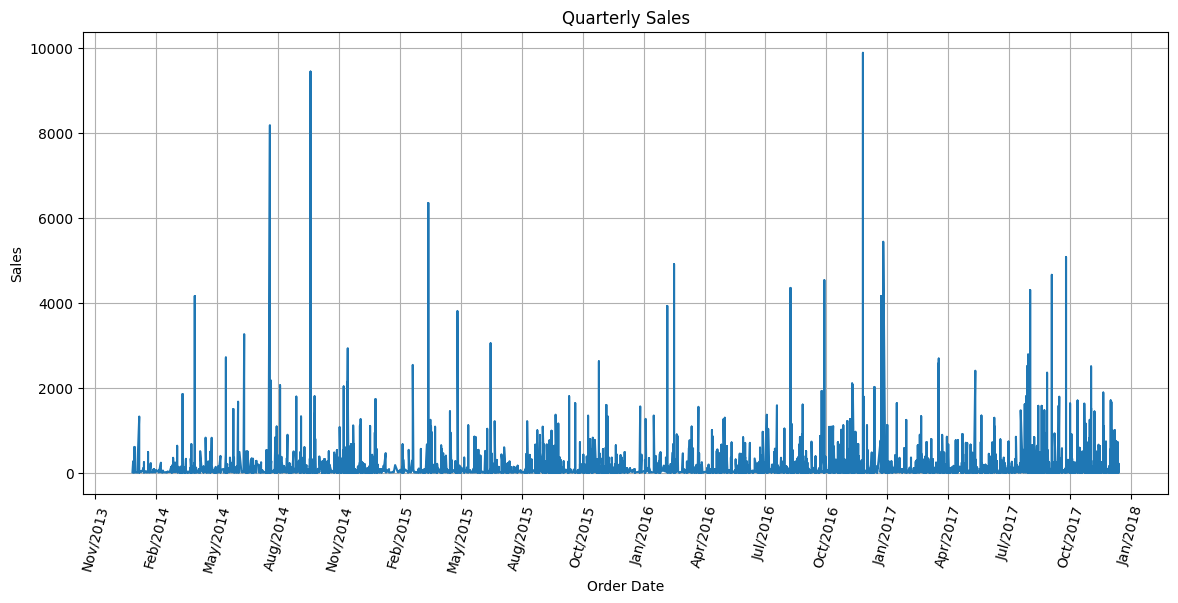

In [15]:
plt.figure(figsize=(14, 6))
plt.grid()
plt.plot(Office_Supplies)
plt.ylabel('Sales')
plt.xlabel('Order Date')
plt.title('Quarterly Sales')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))
plt.xticks(rotation=75)

For ease of processing, we can add seperate columns for Weekday Names, Months and Years.

In [16]:
Office_Supplies['Year'] = Office_Supplies.index.year
Office_Supplies['Month'] = Office_Supplies.index.month
Office_Supplies['Day Name'] = pd.to_datetime(Office_Supplies.index).day_name()

# Display a random sampling of 10 rows
Office_Supplies.sample(10, random_state=0)

,Sales,Year,Month,Day Name
Order Date,,,,
2015-07-05,7.230,2015,7,Sunday
2016-11-06,84.840,2016,11,Sunday
2017-10-06,9.344,2017,10,Friday
2017-07-31,11.540,2017,7,Monday
2014-04-05,55.480,2014,4,Saturday
2017-05-20,21.500,2017,5,Saturday
2015-11-14,826.110,2015,11,Saturday
2017-11-11,25.500,2017,11,Saturday
2014-09-23,12.940,2014,9,Tuesday


(array([16018., 16108., 16198., 16288., 16378., 16468., 16558., 16648.,
        16738., 16828., 16918., 17008., 17098., 17188., 17278., 17368.,
        17458., 17548.]),
 [Text(16018.0, 0, 'Nov/2013'),
  Text(16108.0, 0, 'Feb/2014'),
  Text(16198.0, 0, 'May/2014'),
  Text(16288.0, 0, 'Aug/2014'),
  Text(16378.0, 0, 'Nov/2014'),
  Text(16468.0, 0, 'Feb/2015'),
  Text(16558.0, 0, 'May/2015'),
  Text(16648.0, 0, 'Aug/2015'),
  Text(16738.0, 0, 'Oct/2015'),
  Text(16828.0, 0, 'Jan/2016'),
  Text(16918.0, 0, 'Apr/2016'),
  Text(17008.0, 0, 'Jul/2016'),
  Text(17098.0, 0, 'Oct/2016'),
  Text(17188.0, 0, 'Jan/2017'),
  Text(17278.0, 0, 'Apr/2017'),
  Text(17368.0, 0, 'Jul/2017'),
  Text(17458.0, 0, 'Oct/2017'),
  Text(17548.0, 0, 'Jan/2018')])

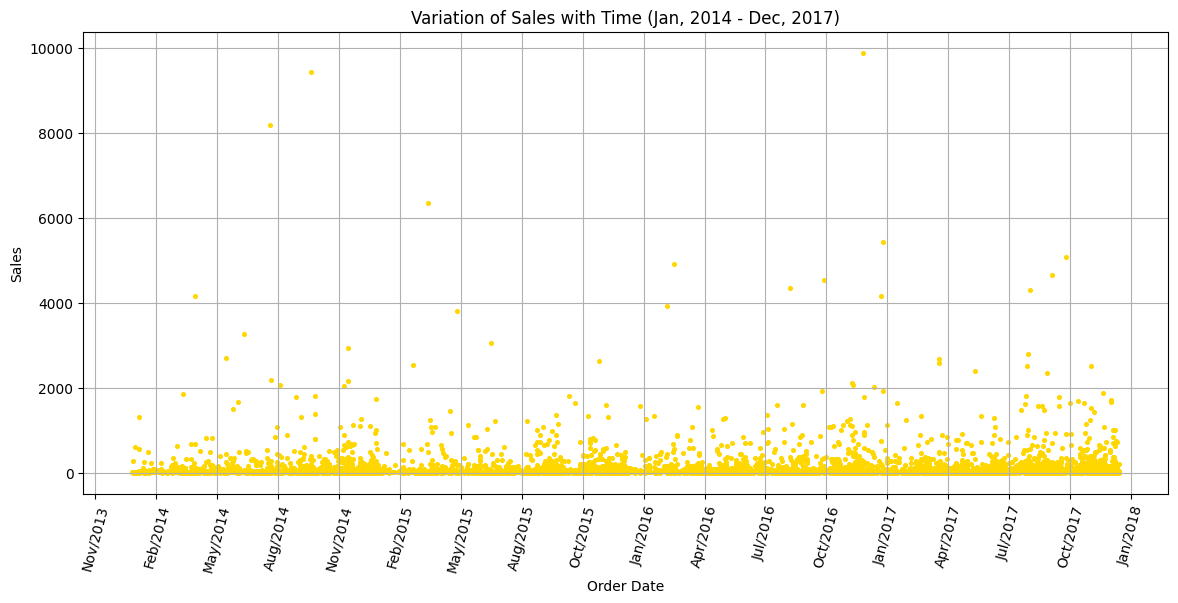

In [17]:
plt.figure(figsize=(14, 6))
plt.grid()
plt.scatter(Office_Supplies.index, Office_Supplies['Sales'], marker='o', color='gold', s=7)
plt.ylabel('Sales')
plt.xlabel('Order Date')
plt.title('Variation of Sales with Time (Jan, 2014 - Dec, 2017)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))
plt.xticks(rotation=75)

### **Checking for Seasonality**

Seasonality refers to predictable changes that occur over a one-year period in a business or economy based on the seasons including calendar or commercial seasons.

#### **Case I: No sampling**

Text(0, 0.5, 'Monthly Consoidated Sales')

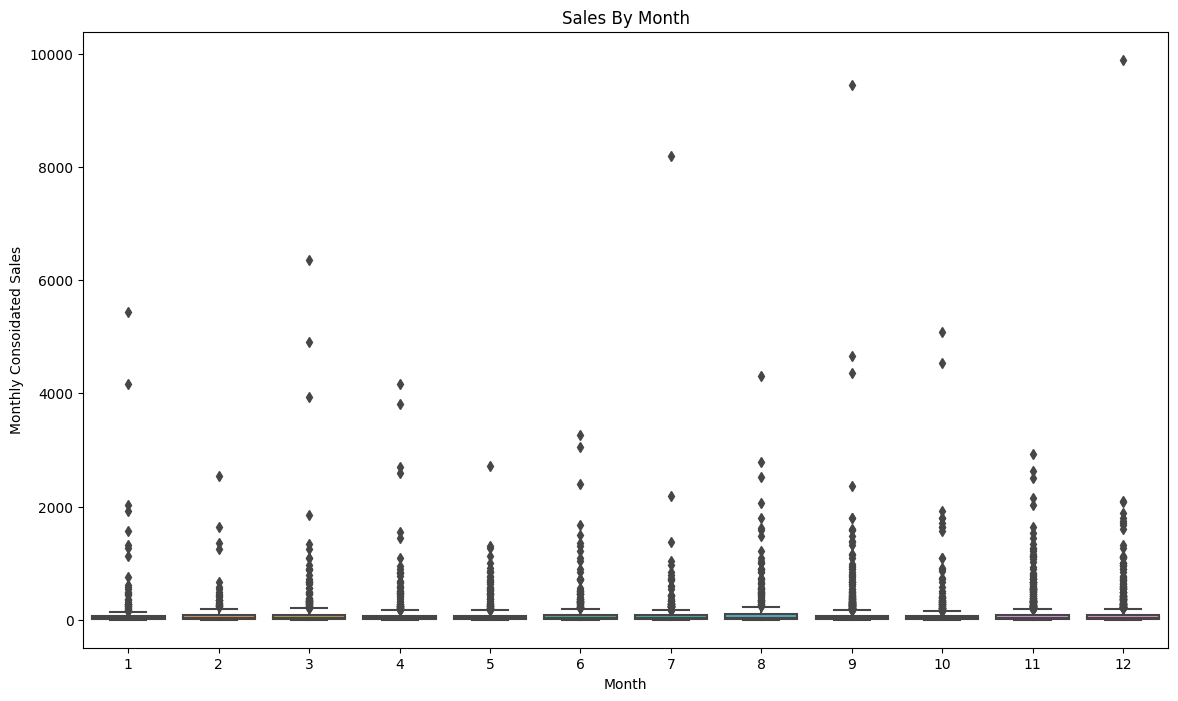

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=Office_Supplies, x='Month', y='Sales', ax=ax)
ax.set_title('Sales By Month')
ax.set_ylabel('Monthly Consoidated Sales')

We will now try to see the measure 

Text(0, 0.5, 'Sales')

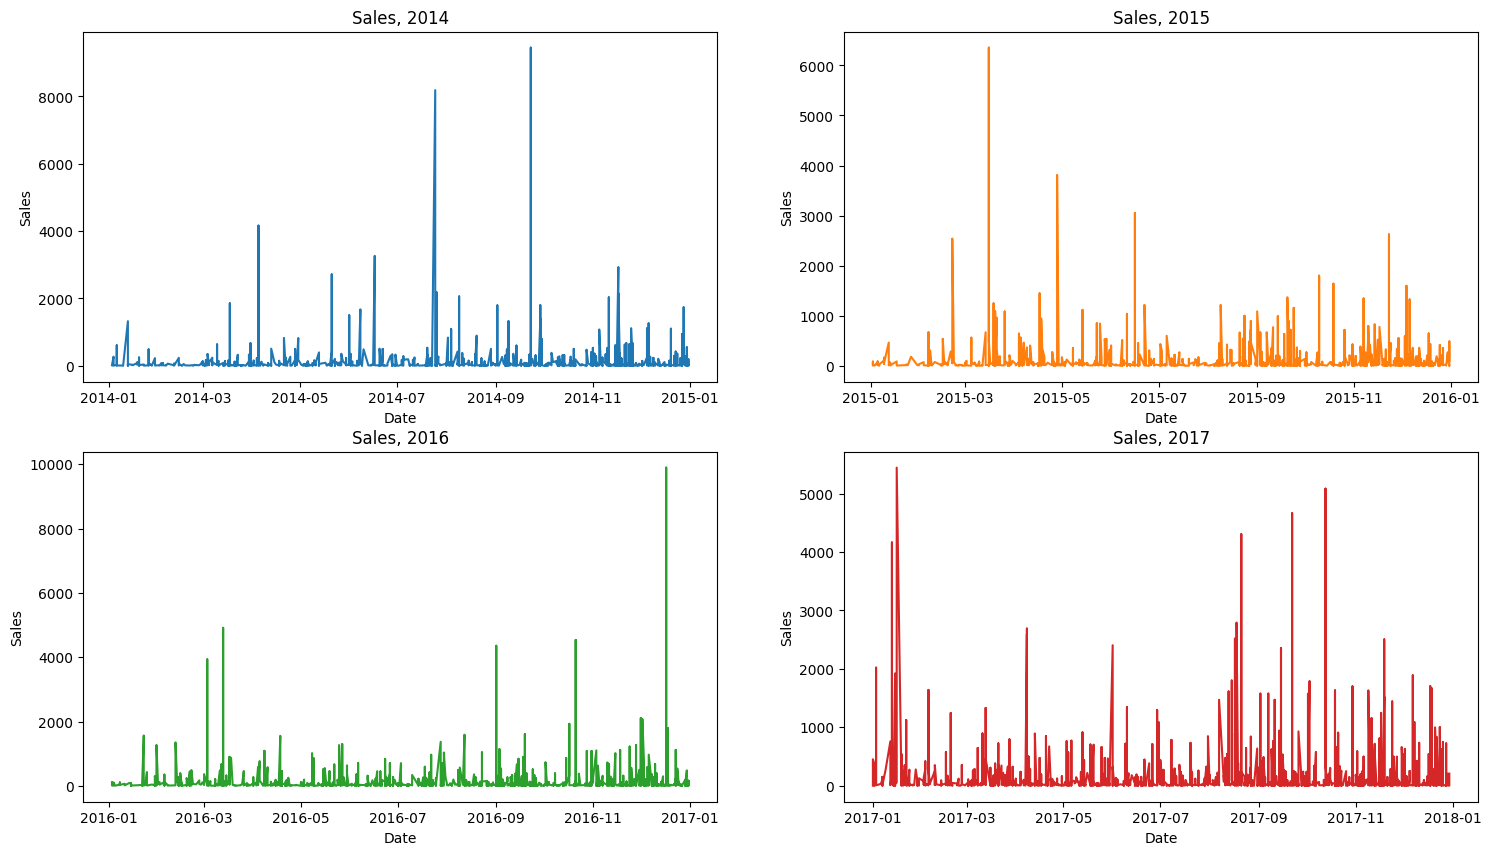

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].plot(Office_Supplies.loc['2014'].index, Office_Supplies.loc['2014']['Sales'])
axs[0, 0].set_title('Sales, 2014')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sales')
axs[0, 1].plot(Office_Supplies.loc['2015'].index, Office_Supplies.loc['2015']['Sales'], 'tab:orange')
axs[0, 1].set_title('Sales, 2015')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Sales')
axs[1, 0].plot( Office_Supplies.loc['2016'].index, Office_Supplies.loc['2016']['Sales'],'tab:green')
axs[1, 0].set_title('Sales, 2016')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Sales')
axs[1, 1].plot(Office_Supplies.loc['2017'].index, Office_Supplies.loc['2017']['Sales'], 'tab:red')
axs[1, 1].set_title('Sales, 2017')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Sales')

#### Observations:

- The trends and seasonality is not obvious from the above plots, as there are a lots of data points.

- There seems to be an indication of seasonality during the 7th and 9th months of the year 2014, 9th and 11th months of 2017, and 3rd month of 2015 and 2016 but we can't be certain.

- Next, we can roll-up the data, weekly & monthly and then re-plot.


#### **Case II: Weekly Resampling**

In [20]:
Supplies_weekly = pd.DataFrame(Office_Supplies['Sales'].resample('W').sum())
Supplies_weekly.head()

,Sales
Order Date,
2014-01-05,324.044
2014-01-12,708.004
2014-01-19,2337.764
2014-01-26,1143.170
2014-02-02,368.784


Text(0, 0.5, 'Sales')

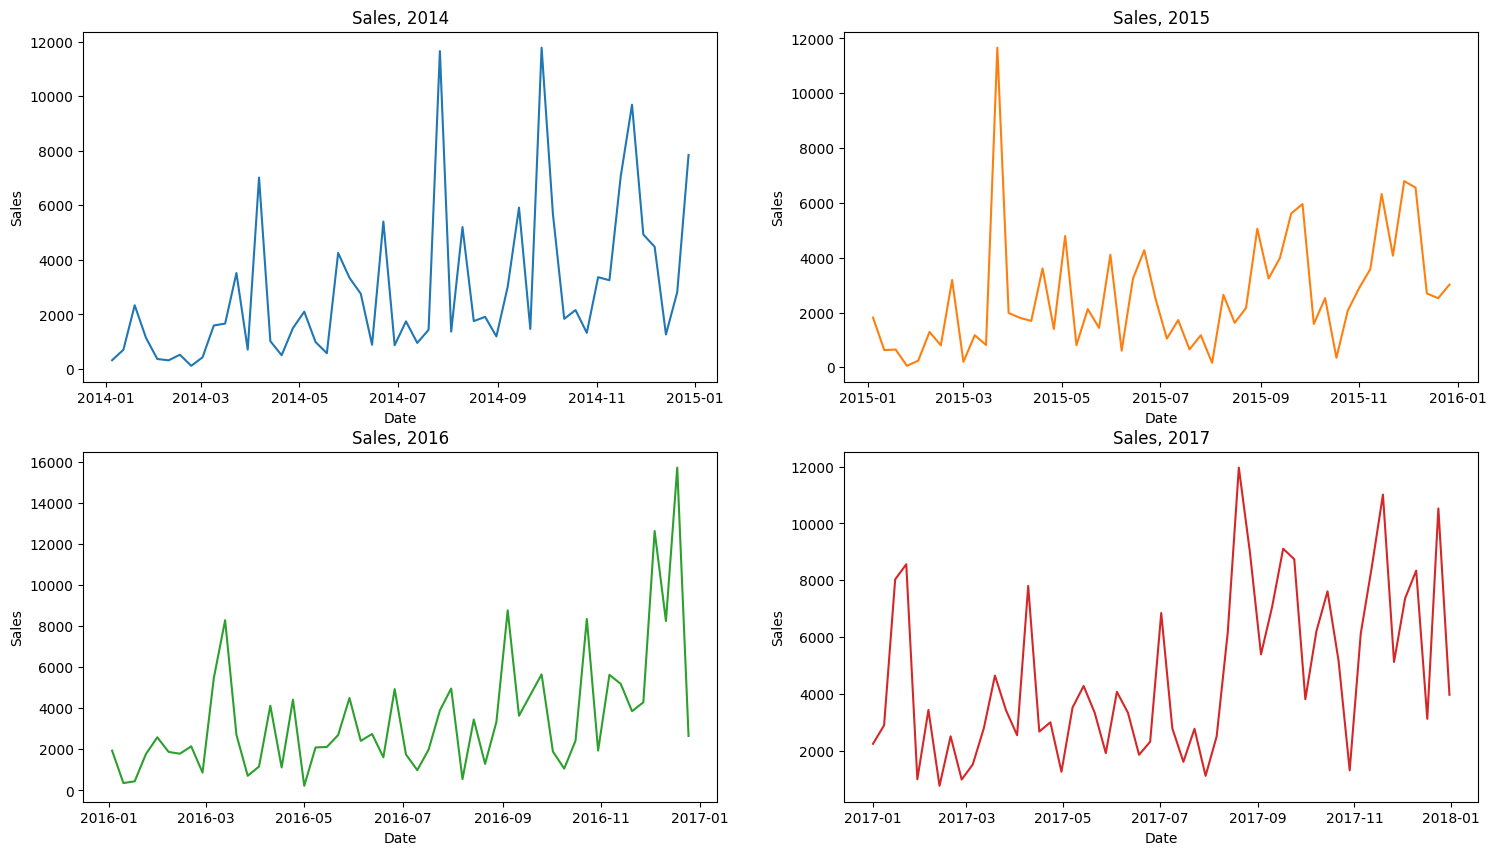

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].plot( Supplies_weekly.loc['2014'].index, Supplies_weekly.loc['2014']['Sales'])
axs[0, 0].set_title('Sales, 2014')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sales')
axs[0, 1].plot(Supplies_weekly.loc['2015'].index, Supplies_weekly.loc['2015']['Sales'], 'tab:orange')
axs[0, 1].set_title('Sales, 2015')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Sales')
axs[1, 0].plot( Supplies_weekly.loc['2016'].index, Supplies_weekly.loc['2016']['Sales'],'tab:green')
axs[1, 0].set_title('Sales, 2016')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Sales')
axs[1, 1].plot(Supplies_weekly.loc['2017'].index, Supplies_weekly.loc['2017']['Sales'], 'tab:red')
axs[1, 1].set_title('Sales, 2017')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Sales')

#### **Case III: Daily Resampling**

In [22]:
data = pd.DataFrame(Office_Supplies['Sales'].resample('MS').mean())
data.head()

,Sales
Order Date,
2014-01-01,97.021600
2014-02-01,34.571742
2014-03-01,84.371363
2014-04-01,134.398482
2014-05-01,100.501746


Text(0, 0.5, 'Sales')

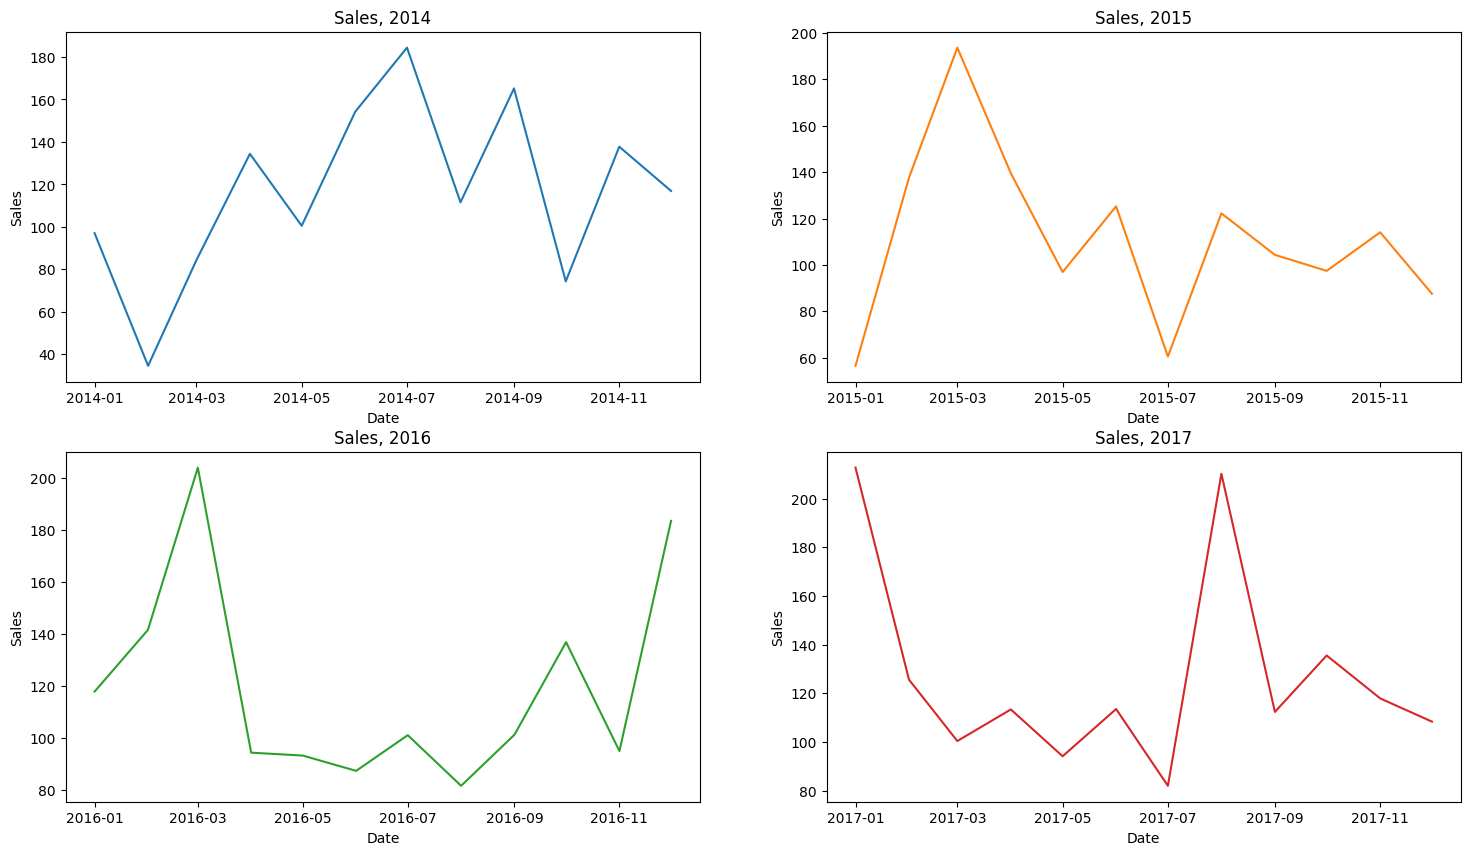

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
axs[0, 0].plot(data.loc['2014'].index, data.loc['2014']['Sales'])
axs[0, 0].set_title('Sales, 2014')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Sales')
axs[0, 1].plot(data.loc['2015'].index, data.loc['2015']['Sales'], 'tab:orange')
axs[0, 1].set_title('Sales, 2015')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Sales')
axs[1, 0].plot(data.loc['2016'].index, data.loc['2016']['Sales'],'tab:green')
axs[1, 0].set_title('Sales, 2016')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Sales')
axs[1, 1].plot(data.loc['2017'].index, data.loc['2017']['Sales'], 'tab:red')
axs[1, 1].set_title('Sales, 2017')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Sales')

### Observations

- Every year, there is slight uptrend visible
- Sales increase in the Oct-Nov quarter for each year
- Consolidated 4 years - slight uptrend in sales numbers
- Sales drop after November of every calender year (Except 2016) ---> _indicates seasonality_

### **Trend Detection**
We will now define a function to check trends (monthly, weekly, yearly, etc) and plot the same.

In [24]:
def detect_trend (X_df):
    coefficients, residuals, _, _, _ = np.polyfit(range(len(X_df)), X_df, 1, full=True)

    mse = residuals[0]/(len(X_df))
    nrmse = np.sqrt(mse)/(X_df.max() - X_df.min())

    print('Slope ' + str(coefficients[0]))
    print('NRMSE: ' + str(nrmse))

    plt.figure(figsize=(18, 6))
    plt.xticks(rotation=90)
    plt.plot(X_df, marker='.', linestyle='-', linewidth=0.5,color='gold', label='Original')
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(X_df))], marker='o', markersize=8, linestyle='-', linewidth=0.5, color='red', label='Regression line')
    plt.legend()
    plt.show()

Slope [4.52722369]
NRMSE: 0.24693161153445506


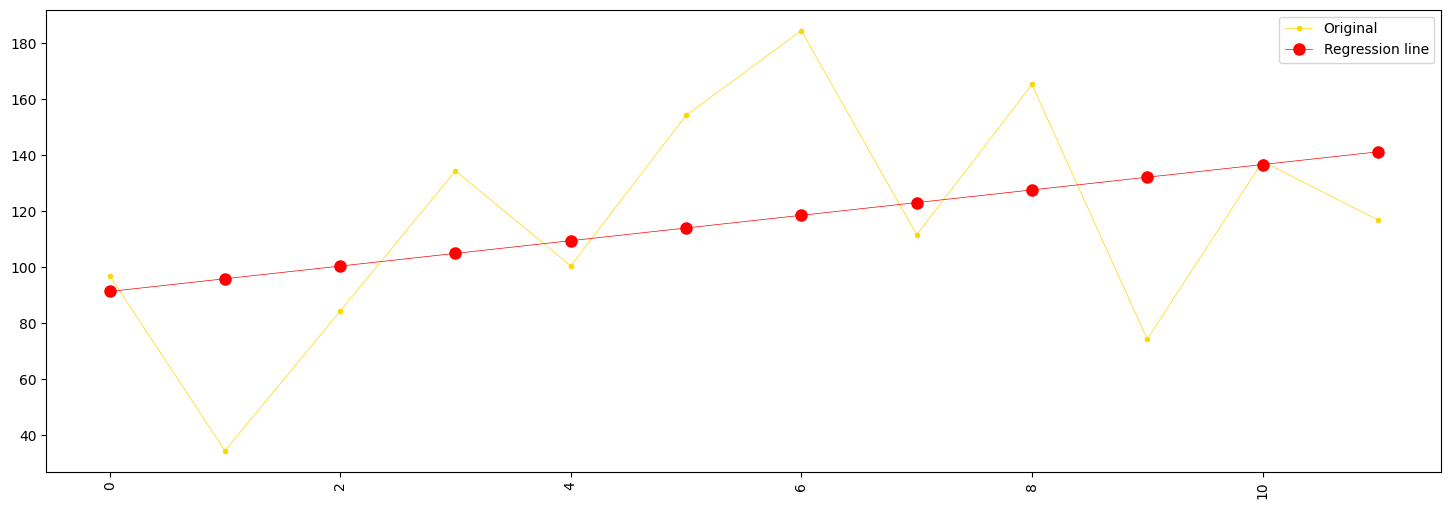

Slope [-2.4789956]
NRMSE: 0.2517720156152423


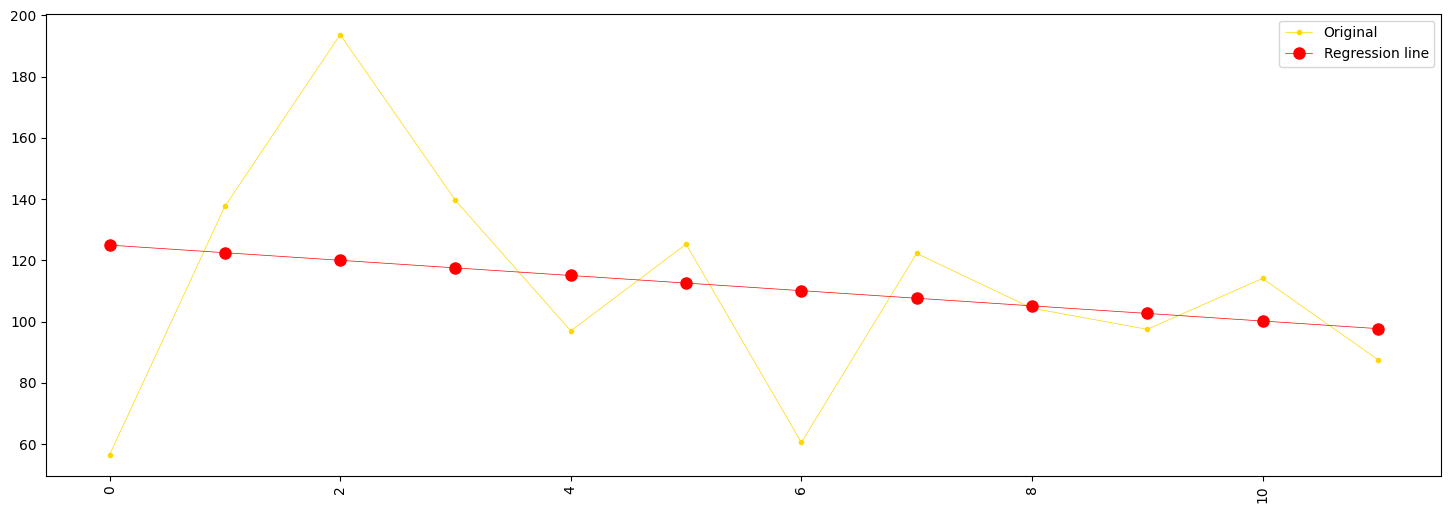

Slope [-0.53849562]
NRMSE: 0.3079965257961466


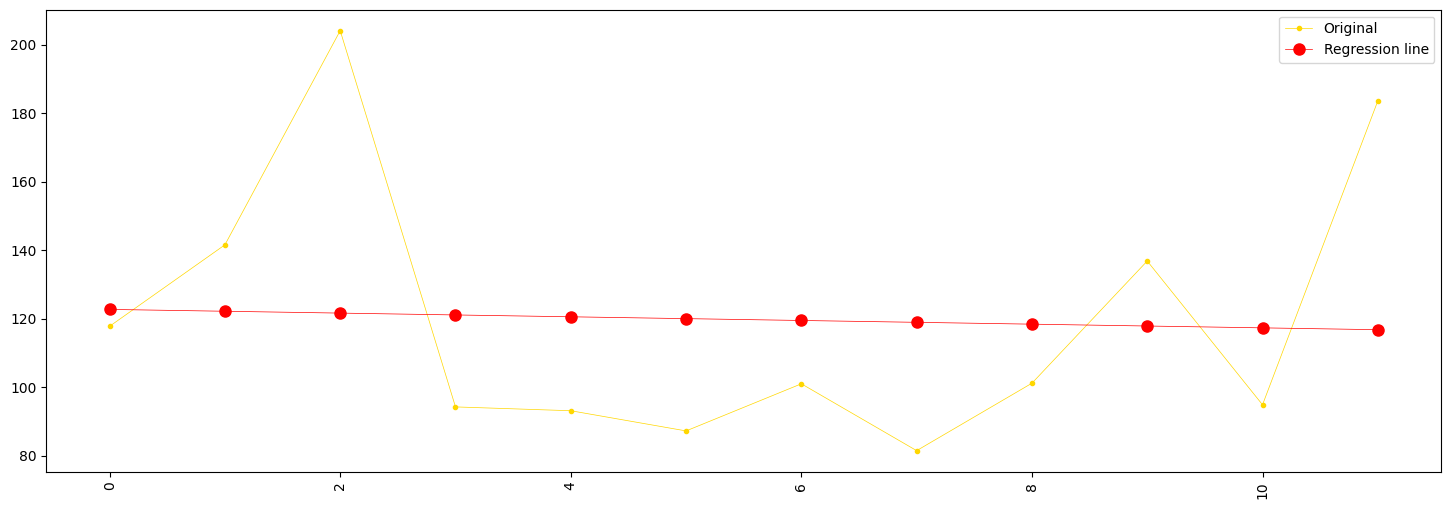

Slope [-2.30751896]
NRMSE: 0.2995936796393823


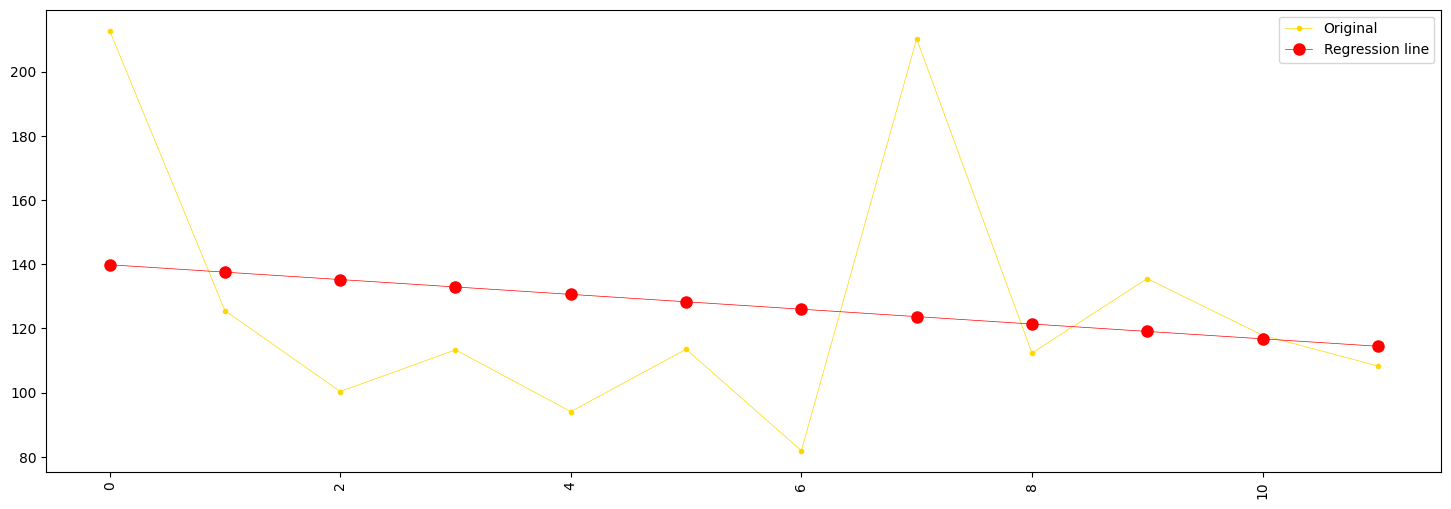

Slope [0.30825551]
NRMSE: 0.21679456559883714


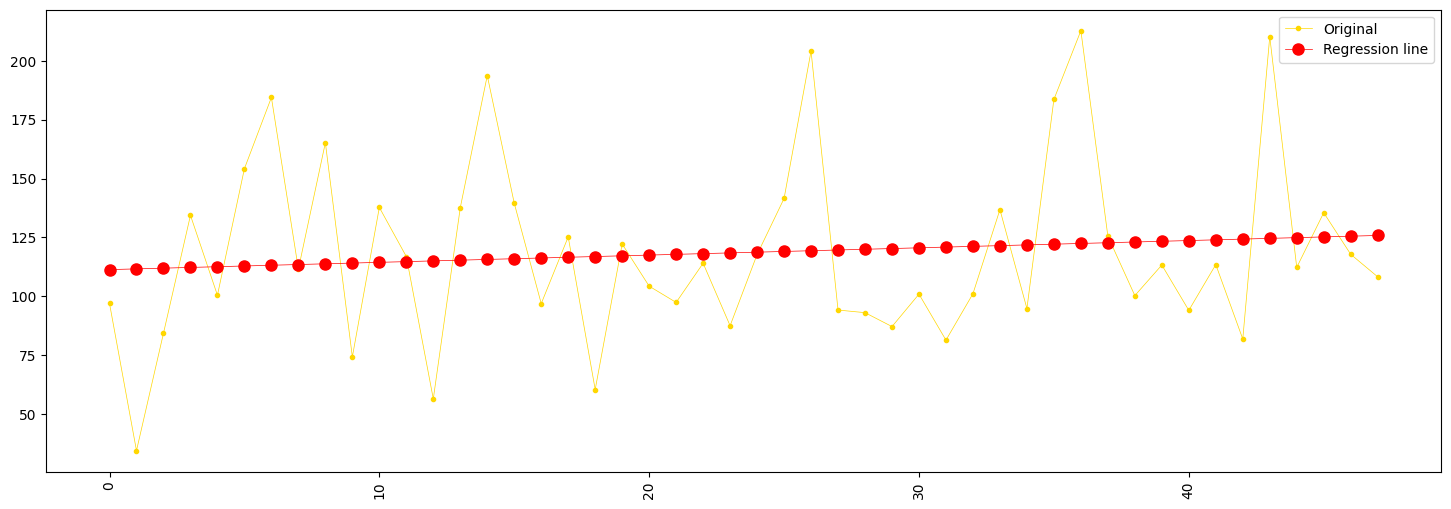

In [25]:
detect_trend(data.loc['2014'].values)
detect_trend(data.loc['2015'].values)
detect_trend(data.loc['2016'].values)
detect_trend(data.loc['2017'].values)
detect_trend(data.values)

### Observations:

- The trend is not clearly visible in the monthly sales data
- Consolidated 4 years - uptrend in sales numbers
- The time-series has slight seasonality pattern, such as sales are always low at the end of the year.There is always an upward trend within any single year with a couple of low months in the mid of the year.

### **Stationarity**

- Data points are often __non-stationary__ or have means, variances and covariances that _change over time_. 

- Non-stationary behaviors can be trends, cycles, random walks or combinations of the three.

- Non-stationary data, as a rule, is _unpredictable and cannot be modeled or forecasted._ The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. 

- In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data.


> A Time Series (TS) is said to be stationary if its statistical properties remain constant over time, i.e.:
> - Constant mean
> - Constant variance
> - An autocovariance that does not depend on time.


- Though stationarity assumption is taken in many TS models, almost __none of the practical time series are stationary.__

- Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 

#### Why does stationarity matter? 

- A stationary time series (TS) is simple to predict as we can assume that future statistical properties are the same or proportional to current statistical properties.

- Most of the models we use in TSA assume covariance-stationarity (#3 above). This means the descriptive statistics these models predict e.g. means, variances, and correlations, are only reliable if the TS is stationary and invalid otherwise.

> "For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables." 

- With that said, most TS we encounter in finance is NOT stationary. Therefore a large part of TSA involves identifying if the series we want to predict is stationary, and if it is not we must find ways to transform it such that it is stationary. 

#### Methods to Verify Stationarity:

1. __Rolling Plots__: Review a time series plot (Moving average or moving variance) of the data and visually check if there are any obvious trends or seasonality.

2. __Summary Statistics__: Review the summary statistics for the data for seasons or random partitions and check for obvious or significant differences.

3. __Statistical Tests__: Use statistical tests to check if the expectations of stationarity are met or have been violated.
   

    > __Dickey-Fuller Test__: This is one of the statistical tests for checking stationarity. 
    > Here the null hypothesis (H0) is that the **TS is non-stationary**. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. 
    > If the **‘Test Statistic’ is less than the ‘Critical Value’**, we can reject the null hypothesis and say that the **series is stationary. **

### **Stationarity Tests:** 
### _Method 1 : Plots_ 

<Axes: xlabel='Order Date'>

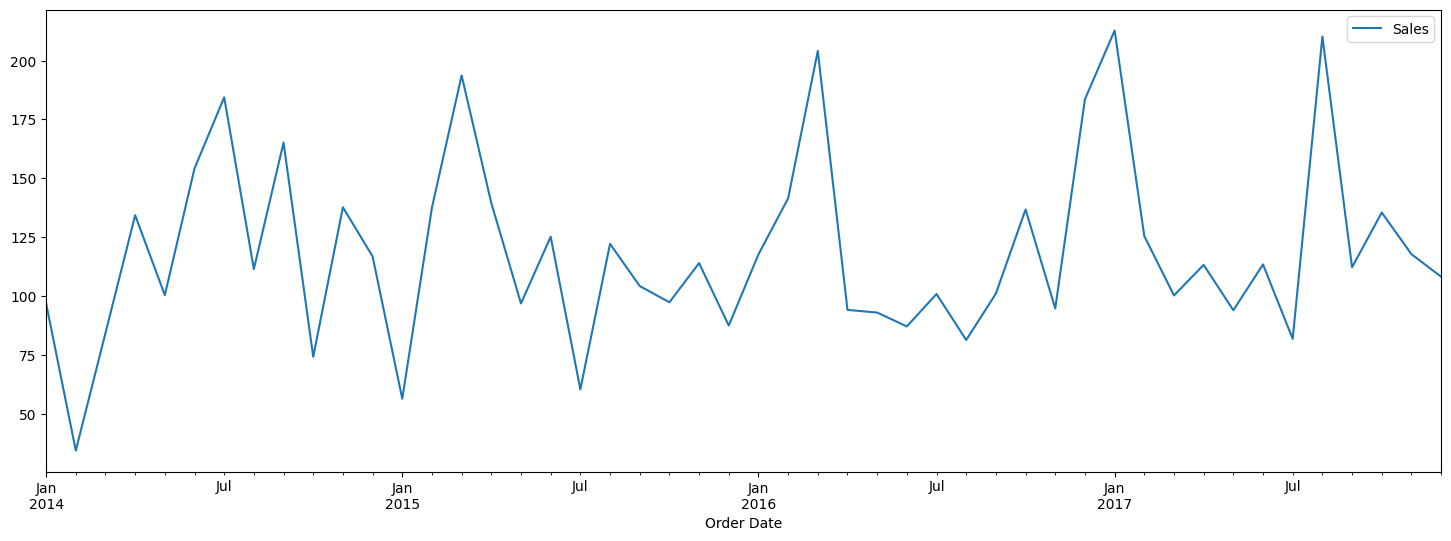

In [26]:
data.plot(figsize=(18, 6))

There are no obvious conclusions that we cann draw from visual means. Hence, we move on to summary statistics.

### _Method 2: Summary Statistics_

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

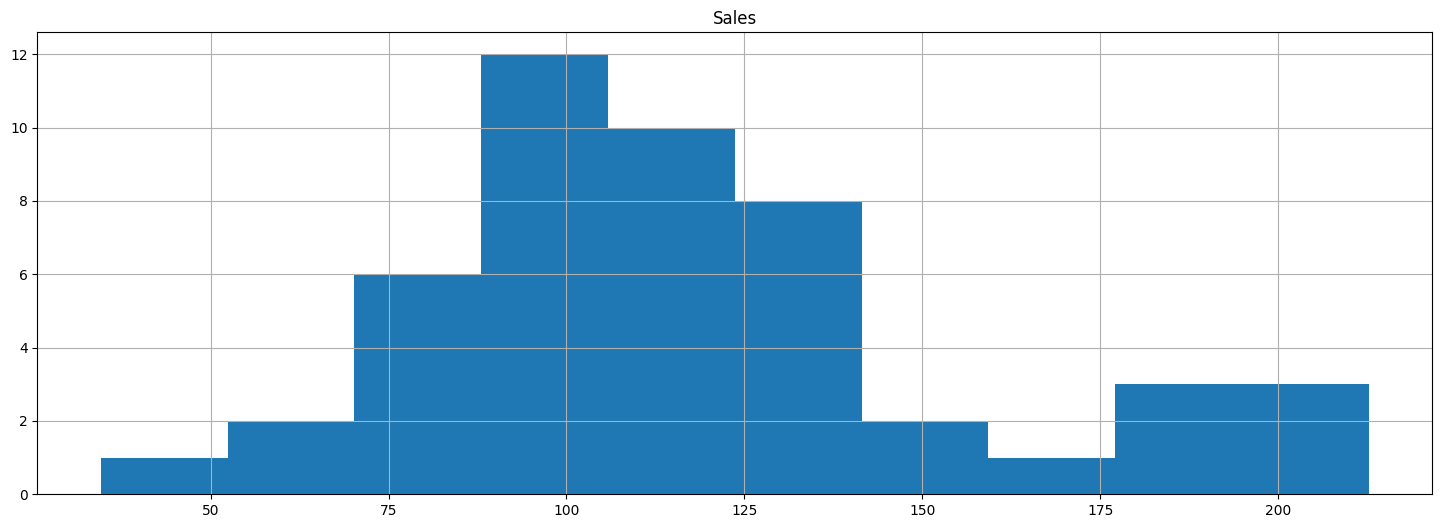

In [27]:
data.hist(figsize=(18, 6))

Split the time series into 2 contiguous sequences. Calculate the mean and variance of each group of numbers and compare the values.

In [28]:
split = int(len(data.values)/2)
print('Statistics of the first segment of data: Mean = {}, Variance = {}'.format(round(data[0:split]['Sales'].mean(), 2),round(data[0: split]['Sales'].var(), 2)))
print('Statistics of the second segment of data: Mean = {}, Variance = {}'.format(round(data[split:]['Sales'].mean(), 2),round(data[split:]['Sales'].var(), 2)))

Statistics of the first segment of data: Mean = 113.8, Variance = 1508.48
Statistics of the second segment of data: Mean = 123.44, Variance = 1594.85


The mean and variance values are different but in the same ball-park range. Hence, the time series is stationary

### _Method 3: Statistical Tests - Augmented Dickey-Fuller test (ADF) test_

The intuition behind the test is that it determines how strongly a time series is defined by a trend. (i.e no stationarity)

- $H_0$ :  time series is _not stationary_

- $H_A$ : time series is stationary 

p-value <= 0.05: Reject the null hypothesis ($H_0$), the data does not have a unit root and is stationary.

p-value > 0.05: Fail to reject the null hypothesis ($H_0$), the data has a unit root and is non-stationary.



In [29]:
for year in np.unique(Office_Supplies.Year):
    result = adfuller(Office_Supplies.loc[str(year)]['Sales'].values)
    
    print('\nFor the year : ', year)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')

    for key, value in result[4].items():
        print('\t%5s: %8.3f' % (key, value))


For the year :  2014
ADF Statistic: -35.138301
p-value: 0.000000
Critical Values:
	   1%:   -3.436
	   5%:   -2.864
	  10%:   -2.568

For the year :  2015
ADF Statistic: -34.901046
p-value: 0.000000
Critical Values:
	   1%:   -3.436
	   5%:   -2.864
	  10%:   -2.568

For the year :  2016
ADF Statistic: -39.155034
p-value: 0.000000
Critical Values:
	   1%:   -3.435
	   5%:   -2.863
	  10%:   -2.568

For the year :  2017
ADF Statistic: -44.934673
p-value: 0.000000
Critical Values:
	   1%:   -3.434
	   5%:   -2.863
	  10%:   -2.568


In [30]:
result = adfuller(Office_Supplies['Sales'].values)

print('\nFor the CONSOLIDATED 4 years')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%5s: %8.3f' % (key, value)) 


For the CONSOLIDATED 4 years
ADF Statistic: -25.959008
p-value: 0.000000
Critical Values:
	   1%:   -3.431
	   5%:   -2.862
	  10%:   -2.567


### Conclusion

1. For the consolidated years: p-value is < .05 or .01. hence $H_0$ can be rejected. This means that the **consolidated years time series is stationary.**
4. Yearly- p-value method : p-value is $\lt$ 0.05 so we reject the null hypothesis for yearly TS. This also means that the **yearly time series is stationary.**
  

### **Reducing noise**

- Aggregation – taking average for a time period like monthly/weekly averages

- Smoothing – taking rolling averages (Moving average)

- Polynomial Fitting – fit a regression model

### _1. Smoothing - Moving average_

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

In [31]:
def test_stationarity(timeseries, reduced_timeseries=None, smoothing_type='R'):
     
    # Plot rolling statistics
    plt.figure(figsize=(18,6))    
    orig = plt.plot(timeseries, marker='.', linestyle='-', linewidth=0.5, color='blue', label='Original')
    mean = plt.plot(reduced_timeseries, marker='.', linestyle='-', linewidth=0.5, color='red', label='Reduced')
    plt.grid()
    plt.legend(loc='best')
    
    if smoothing_type == 'R':
        title = 'Smoothing by Rolling MA'
    elif smoothing_type == 'E':
        title = 'Smoothing by Exponential weighted MA'
    else:
        title = 'Default MA'
    plt.title(title)
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(reduced_timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print (dfoutput)

Text(0.5, 1.0, 'Monthly sales & Rolling Mean')

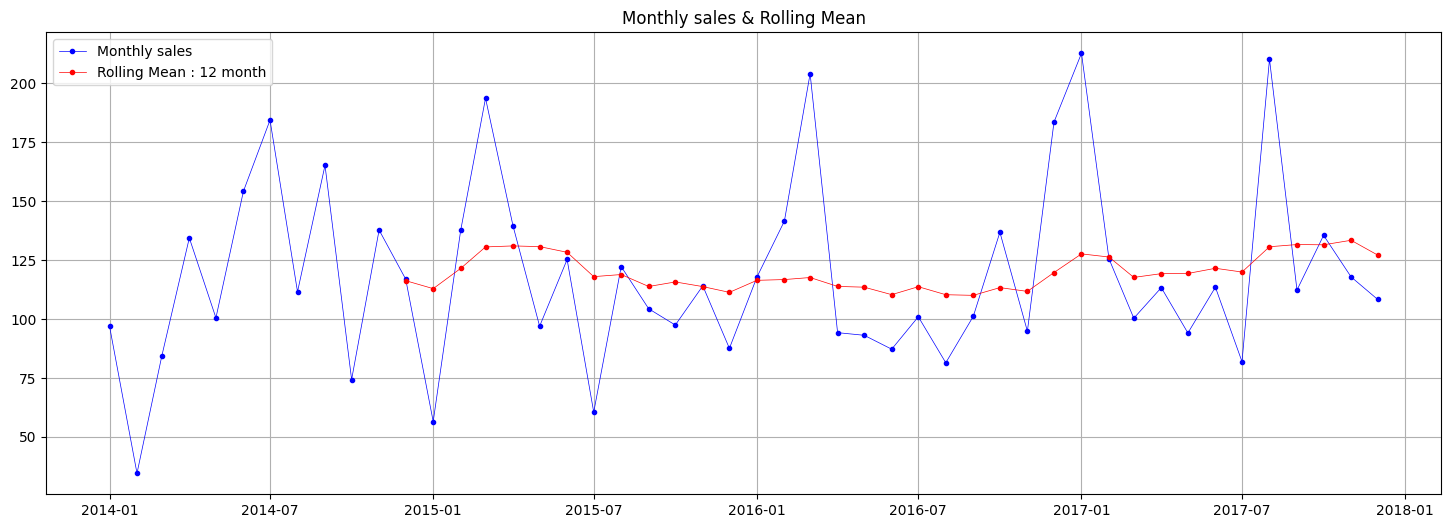

In [32]:
moving_avg = data.rolling(12).mean()
plt.figure(figsize=(18,6))
plt.plot(data, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Rolling Mean : 12 month')
plt.legend(loc='best')
plt.grid()
plt.title('Monthly sales & Rolling Mean')

In [33]:
Diff = data - moving_avg
Diff.dropna(inplace=True)
Diff.head()

,Sales
Order Date,
2014-12-01,0.653465
2015-01-01,-56.372470
2015-02-01,16.156649
2015-03-01,63.093650
2015-04-01,8.515165


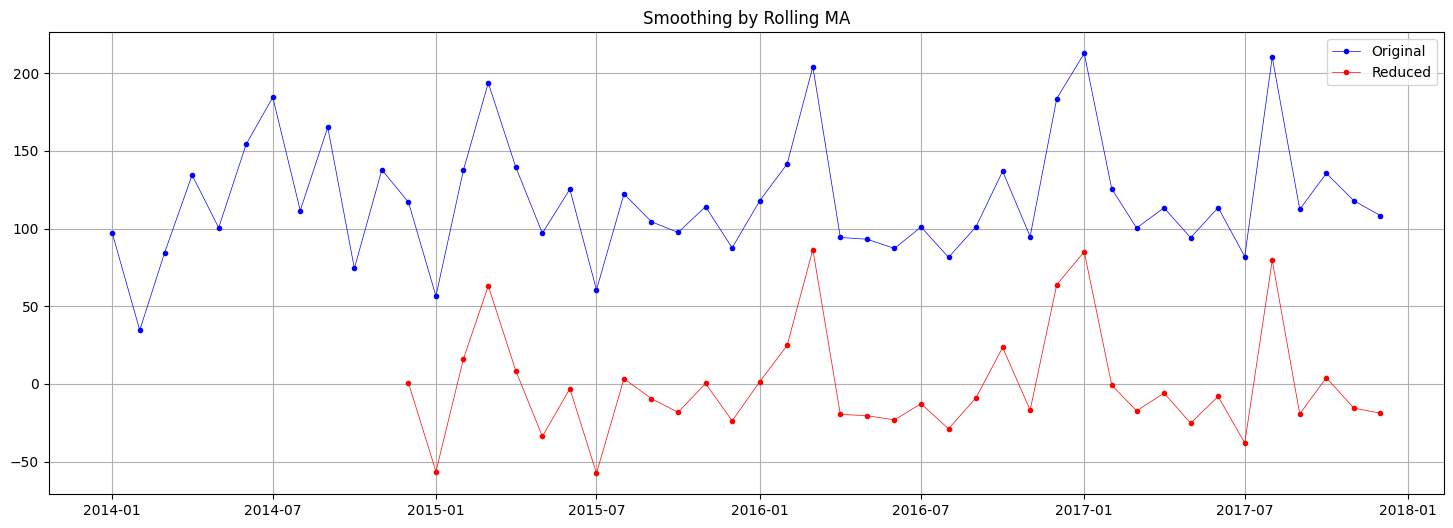

Results of Dickey-Fuller Test:
Test Statistic                 -5.454904
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [34]:
test_stationarity(data, Diff, 'R')

### Observations:

- The rolling values appear to be varying slightly but there is no specific trend. 
- Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a __stationary series.__

### Conclusion:

1. p-value method : p-value of 0.000003 is $\lt$ 0.05 so we REJECT the null hypothesis. The null hypothesis is : the TS is NON-STATTIONARY. Hence it is proved that TS is stationary
    
2. Critical value  : Our statistic value of -5.454904 is more than the value of 3.626652 at 1%. So this falls in the rejection region. Hence we REJECT the null hypothesis. i.e TS is stationary


### _2. Exponentially Moving Weighted Average:_

Text(0.5, 1.0, 'Monthly sales & Rolling Mean')

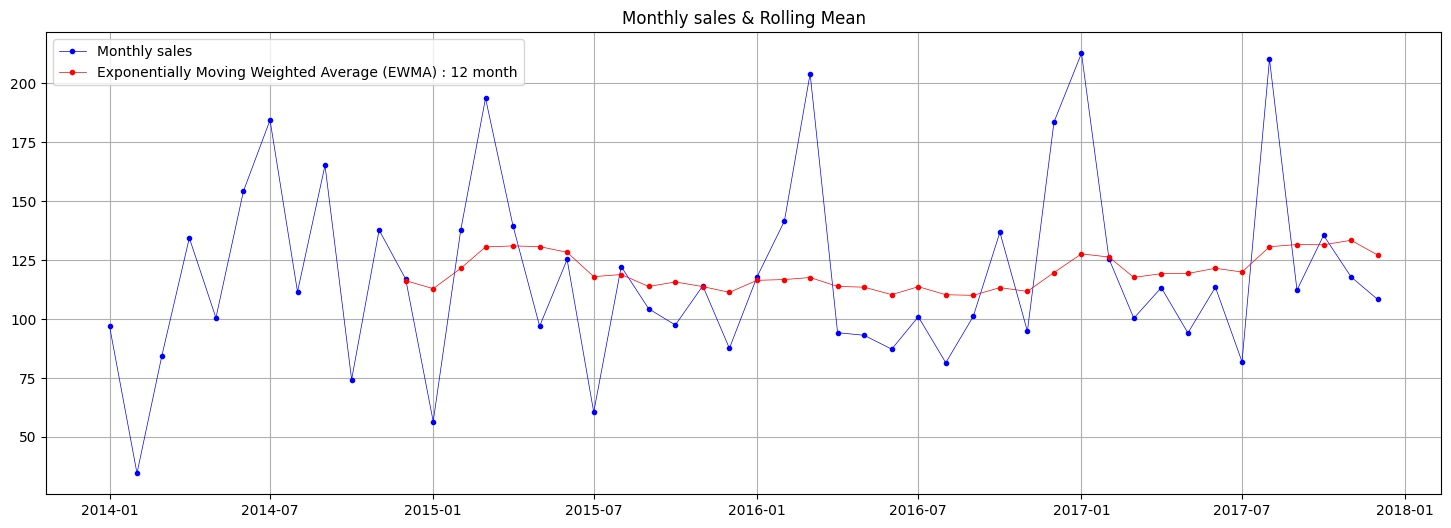

In [35]:
fwd_ewma = pd.Series.ewm(data, span =10).mean() #span used to define decay
plt.figure(figsize=(18,6))
plt.plot(data, marker='.', linestyle='-', linewidth=0.5, label='Monthly sales', c='b')
plt.plot(moving_avg, marker='.', linestyle='-', linewidth=0.5, color='red', label='Exponentially Moving Weighted Average (EWMA) : 12 month')
plt.legend(loc='best')
plt.grid()
plt.title('Monthly sales & Rolling Mean')

In [36]:
Diff_ewma = data - fwd_ewma
Diff_ewma.dropna(inplace=True)
Diff_ewma.head()

,Sales
Order Date,
2014-01-01,0.000000
2014-02-01,-28.102436
2014-03-01,12.975061
2014-04-01,42.245769
2014-05-01,5.952253


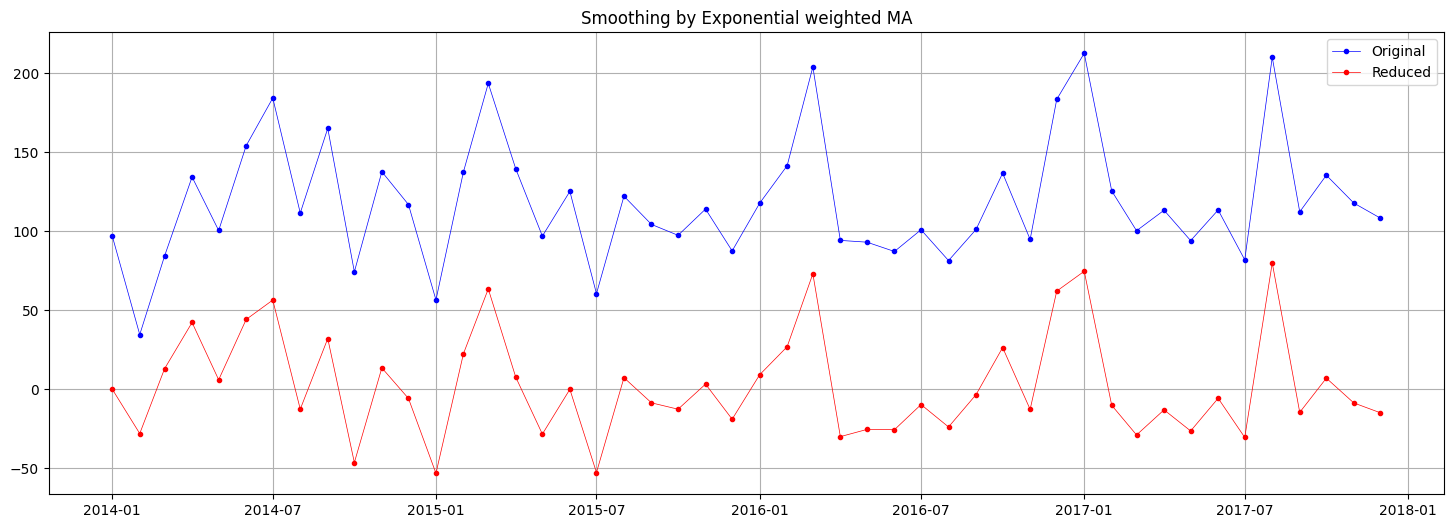

Results of Dickey-Fuller Test:
Test Statistic                -6.422005e+00
p-value                        1.781997e-08
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64


In [37]:
test_stationarity(data, Diff_ewma, 'E') #E stands for exponential

### Observations:
The p-value of 1.781997e-08 is $\lt$ 0.05, so we REJECT the null hypothesis. The null hypothesis is that the TS is NON-STATTIONARY. Hence, it is proved that TS is stationary

### **Decomposition of a Time Series into its Components - Trends, Seasonality,Noise:**

We can also perform a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The `seasonal_decompose` in `statsmodels` implements this conveniently.

Here, we visualize our data using a method called 'time-series decomposition' that allows us to decompose our time series into 3 distinct components: 
- trend, 
- seasonality, and 
- noise.

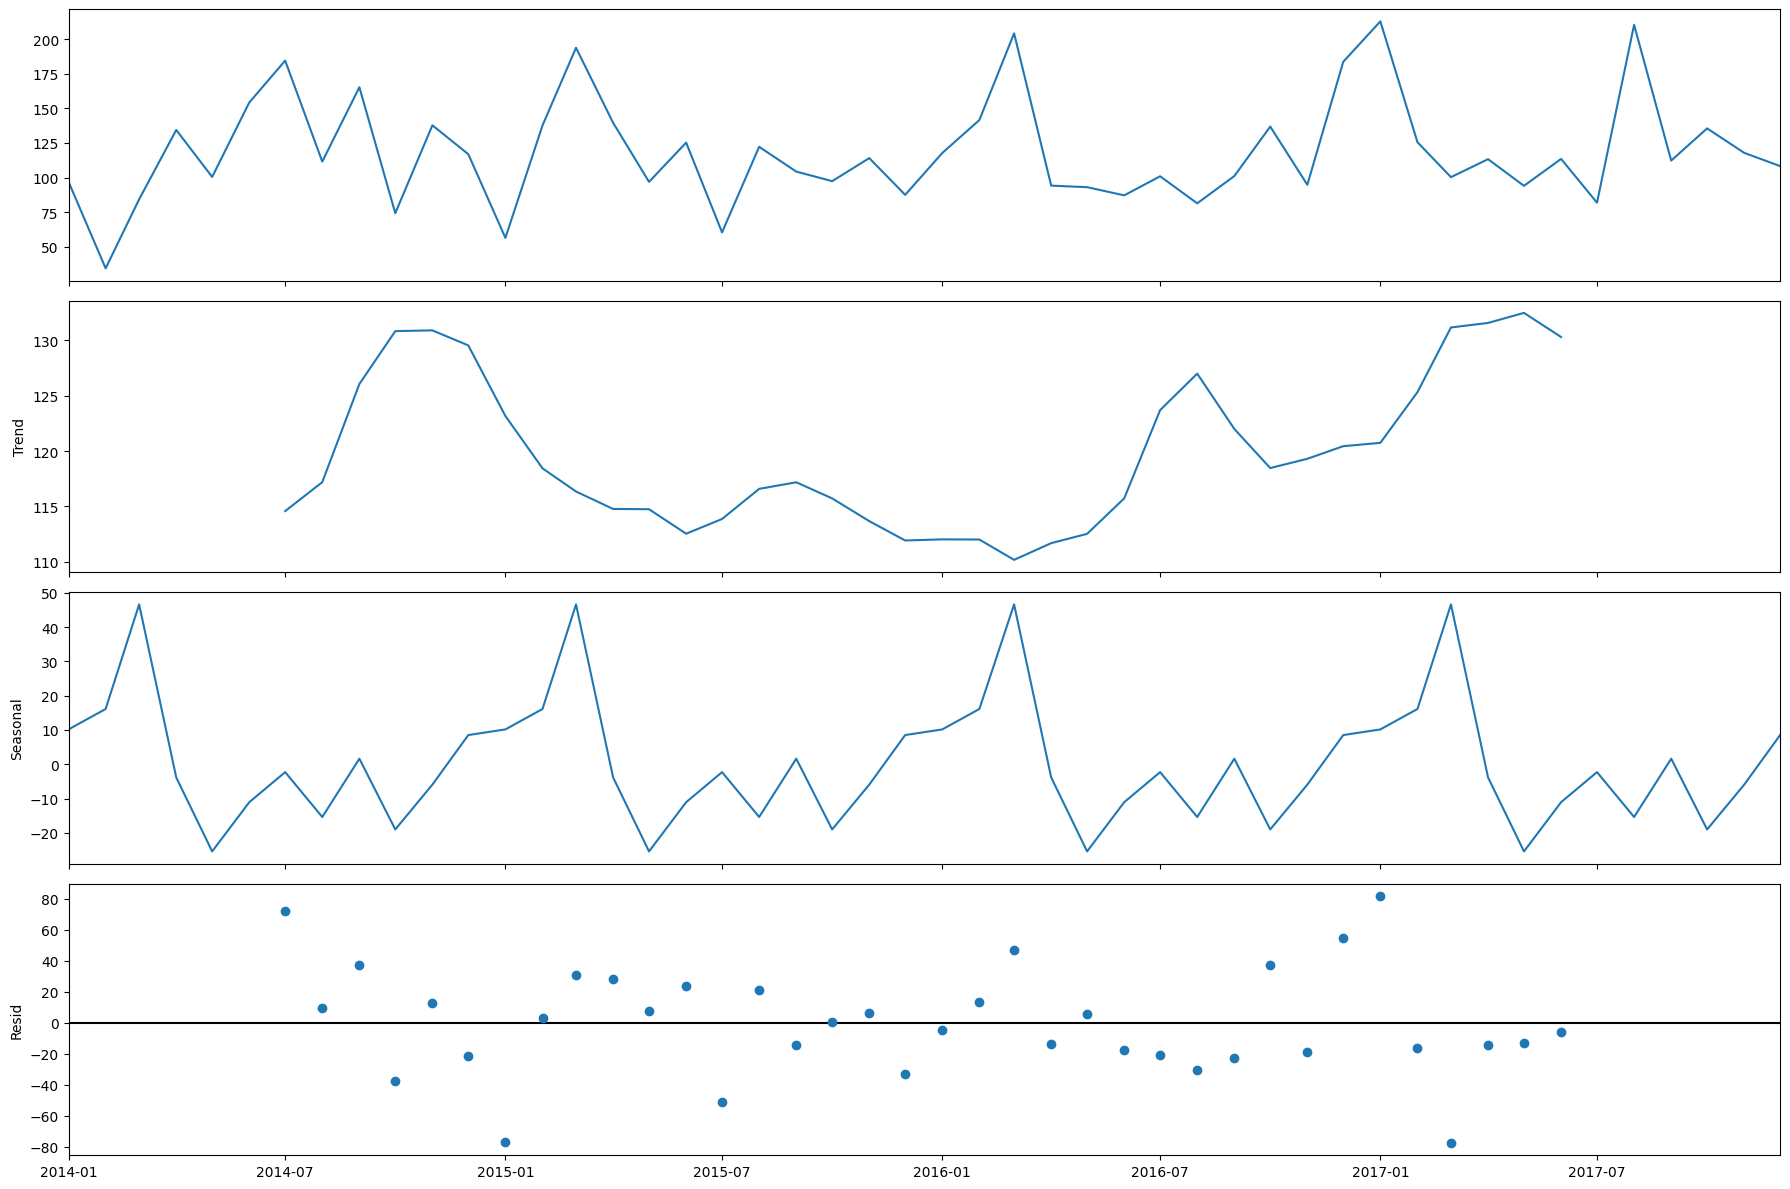

In [38]:
# Additive Decomposition 
rcParams['figure.figsize'] = 18, 12
result_additive = seasonal_decompose(data, model='additive')
fig = result_additive.plot()


### Observations:
The plot above clearly shows that the sales of Office Supplies is unstable, along with its obvious seasonality.We can still see noises.

### **Time Series Forecasting with ARIMA model**

- ARIMA, short for __‘Auto Regressive Integrated Moving Average’__ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

- Any **‘non-seasonal’ time series** that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

- An ARIMA model is characterized by 3 terms: p, d, q where,

    - 'p' is the order of the AR term
    - 'q' is the order of the MA term
    - 'd' is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. 

#### d term

- The first step to build an ARIMA model is to make the time series stationary. Why?

- Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

- The most common approach is to __difference__ it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.

- The value of __d__, therefore, is the minimum number of differencing needed to make the series stationary. 

- And if the time series is already stationary, then d = 0.

#### Next, what are the ‘p’ and ‘q’ terms?

- ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 

- And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

#### **ARIMA model in words:**

Predicted $Y_t$ = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

# 1. How to find the order of differencing (d) in ARIMA model

- Recall, the purpose of differencing it is to make the time series stationary.

- But we need to be careful to not over-difference the series. Because, an over differenced series may still be non-stationary, which in turn will affect the model parameters.

**So how to determine the right order of differencing?**

1. The right order of differencing is the **minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.**

2. If the **autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing.** 

3. On the other hand, if the **lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.**

#### _Procedure:_

First, check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

- Because, you need differencing only if the series is non-stationary. 
- Else, no differencing is needed, that is, d=0.


In [39]:
# check stationarity
result = adfuller(Office_Supplies.loc['2015']['Sales'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -34.901046
p-value: 0.000000


#### **Recap:**
Since P-value is less than the significance level of 0.05, that means we should reject the null hypothesis.
$H_0$ : TS is non stationary

It means the given TS is stationary. Let us cross-check with ACF plot.

Text(0, 0.5, 'Autocorrelation')

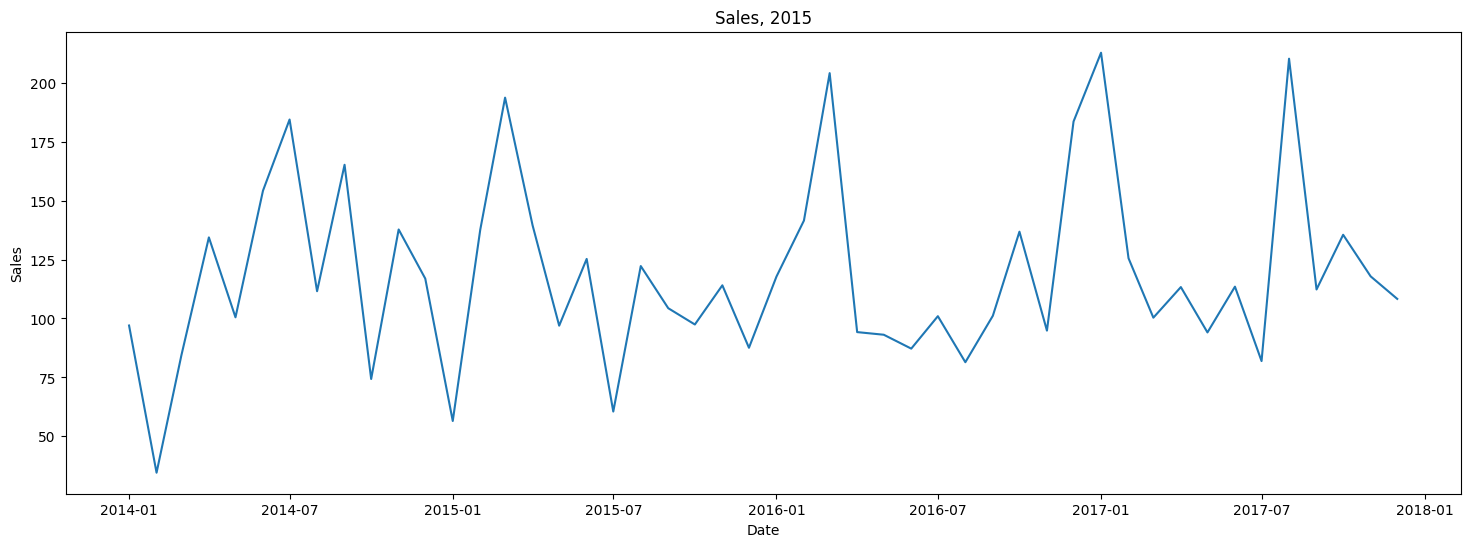

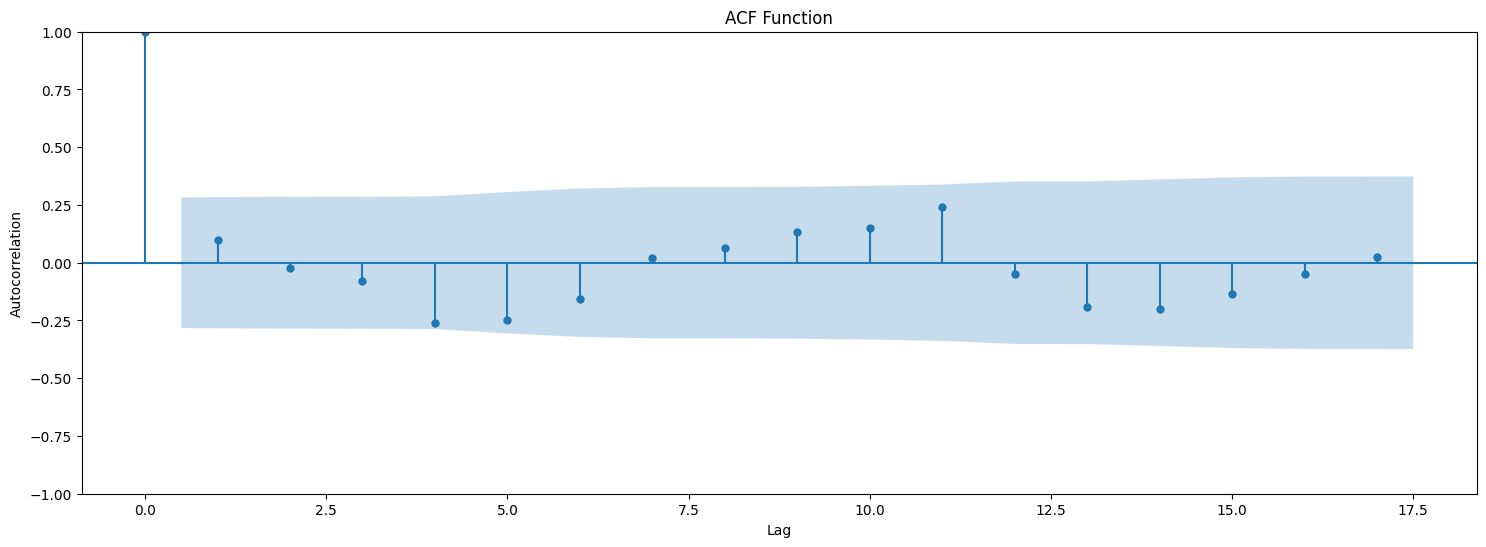

In [40]:
plt.figure(figsize=(18, 6))
plt.plot(data.index, data)
plt.title('Sales, 2015')
plt.xlabel('Date')
plt.ylabel('Sales')
rcParams['figure.figsize'] = 18, 6
acf0 = plot_acf(data)
plt.title('ACF Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')


#### _First Order Differencing:_

Text(0, 0.5, 'Autocorrelation')

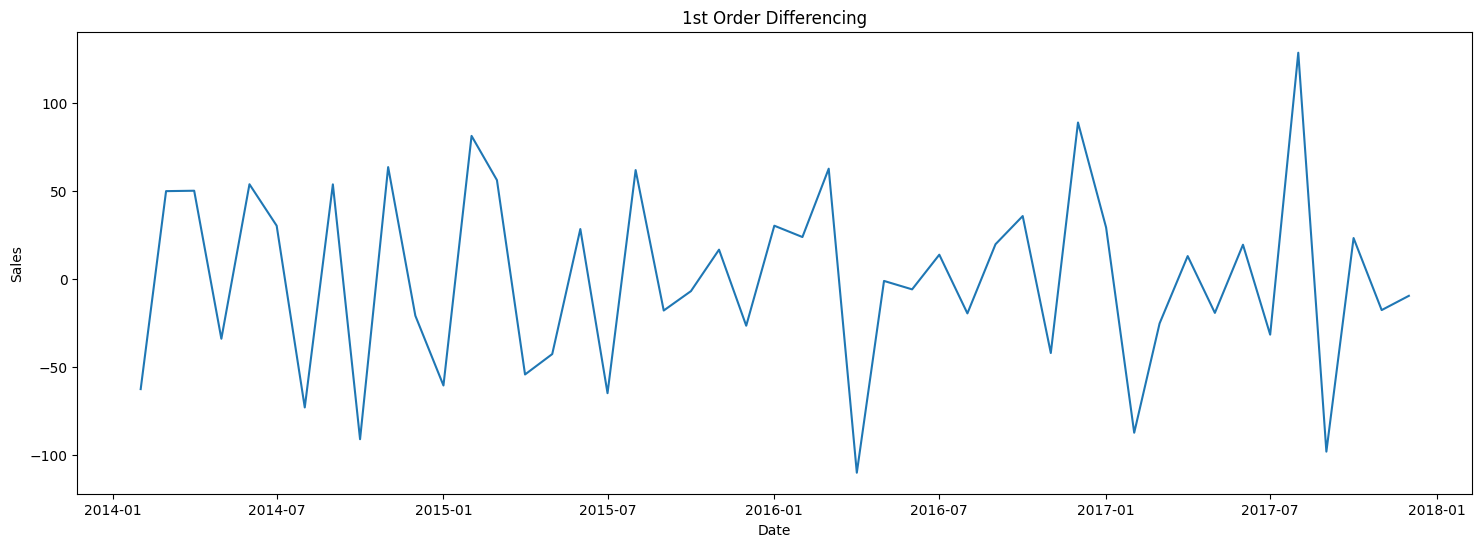

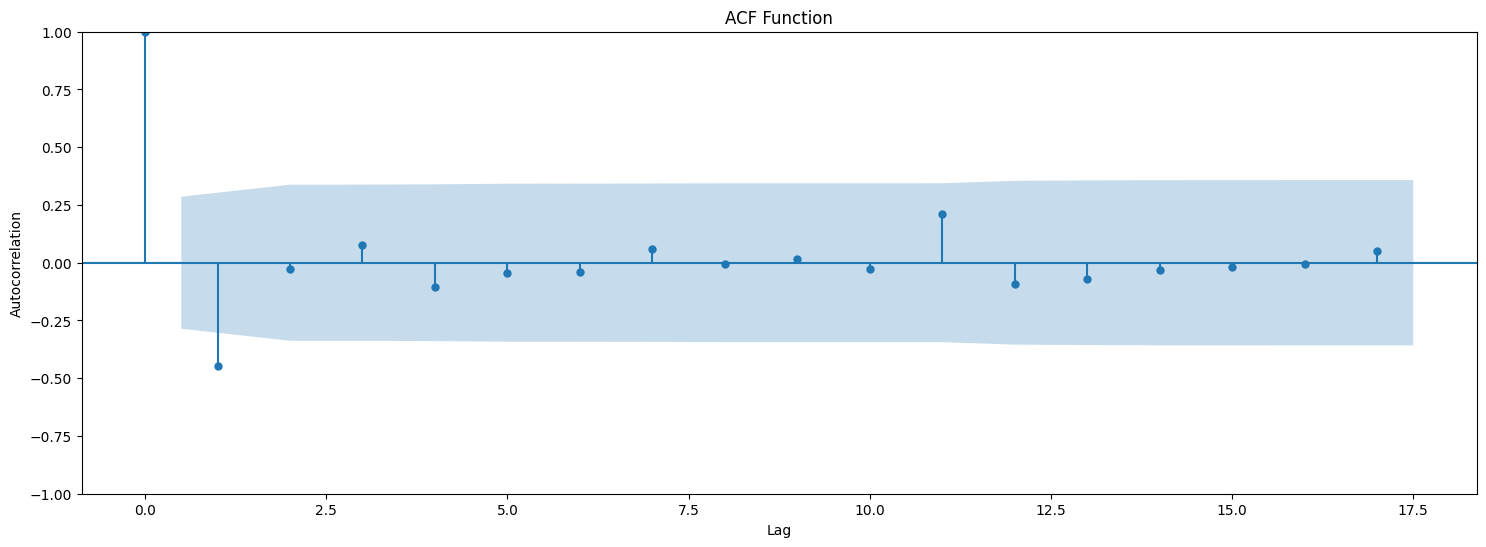

In [41]:
plt.plot(data.diff()); 
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Sales')
acf1 = plot_acf(data.diff().dropna())
plt.title('ACF Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

#### _Second Order Differencing_

Text(0, 0.5, 'Autocorrelation')

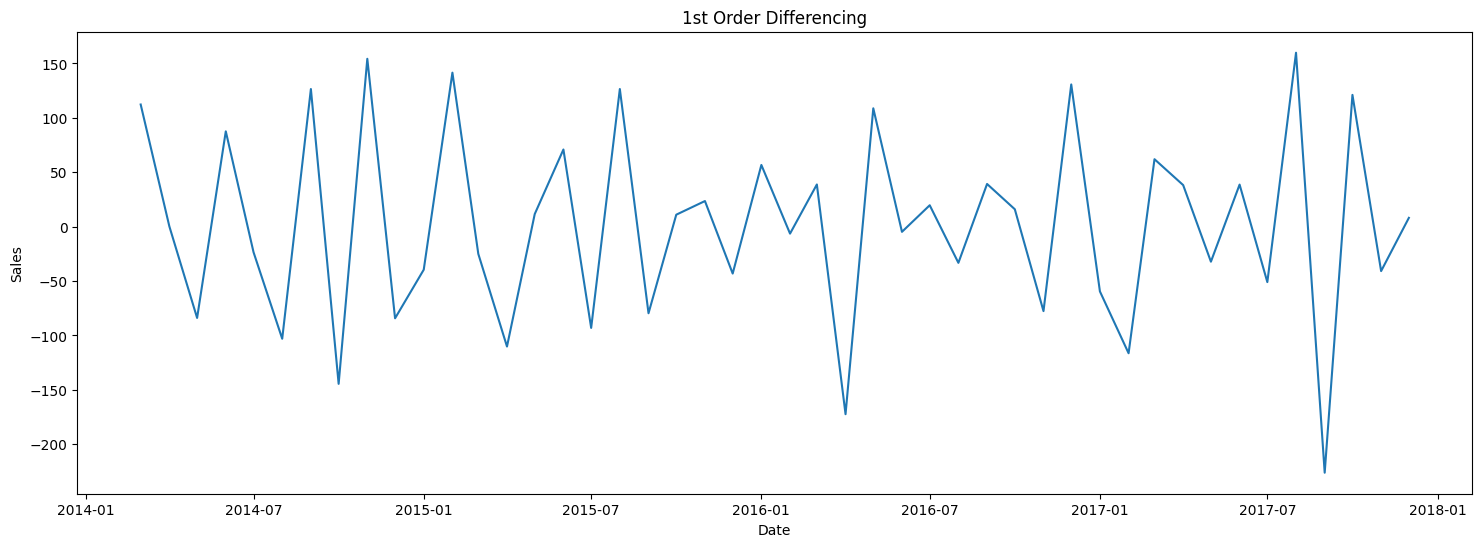

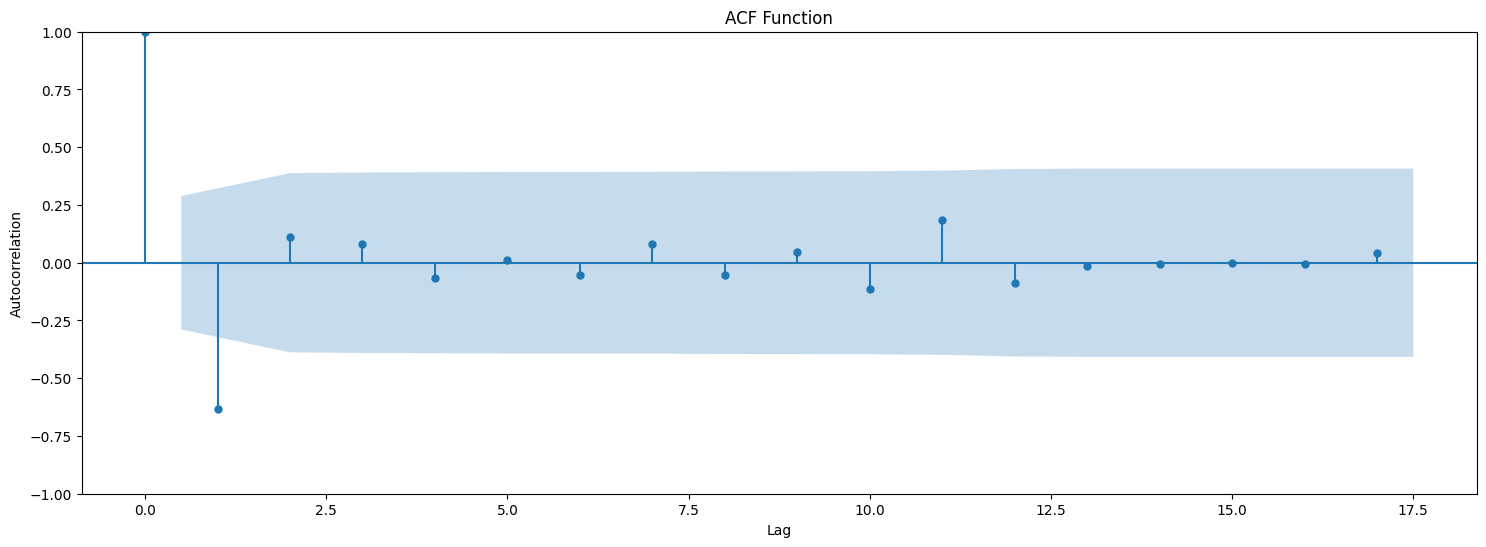

In [42]:
plt.plot(data.diff().diff()); 
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Sales')
acf1 = plot_acf(data.diff().diff().dropna())
plt.title('ACF Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

#### Observations:

- For the above series, the time series reaches stationarity **without ANY differencing.** There is no any statistically significant spikes seen in autocorrelation plot above. 

- Look at the 1st order differencing, with a lag of 1, the ACF goes into negative zone, indicates the over differenced.

- Therefore, we will consider **d = 1 (or we can try with 0)**

#### **How to find the order of the 'AR term' - 'p'**

- After differencing the TS, we need to ensure there is no autocorrelation in the differenced time series 

- We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

Text(0, 0.5, 'Autocorrelation')

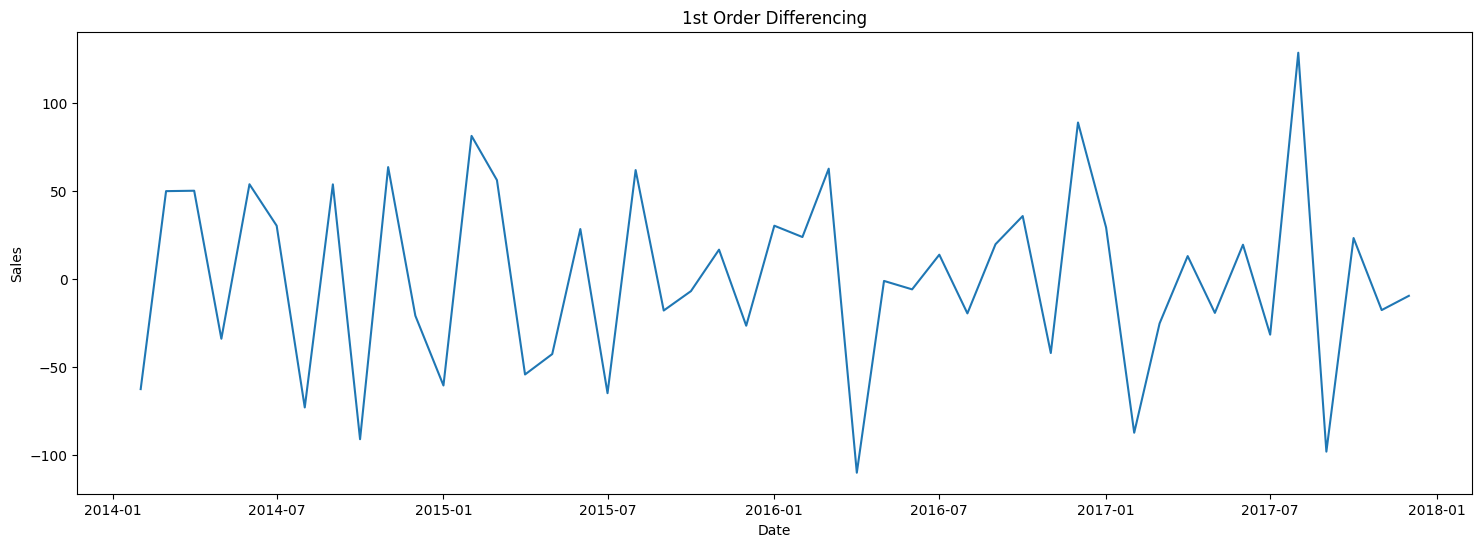

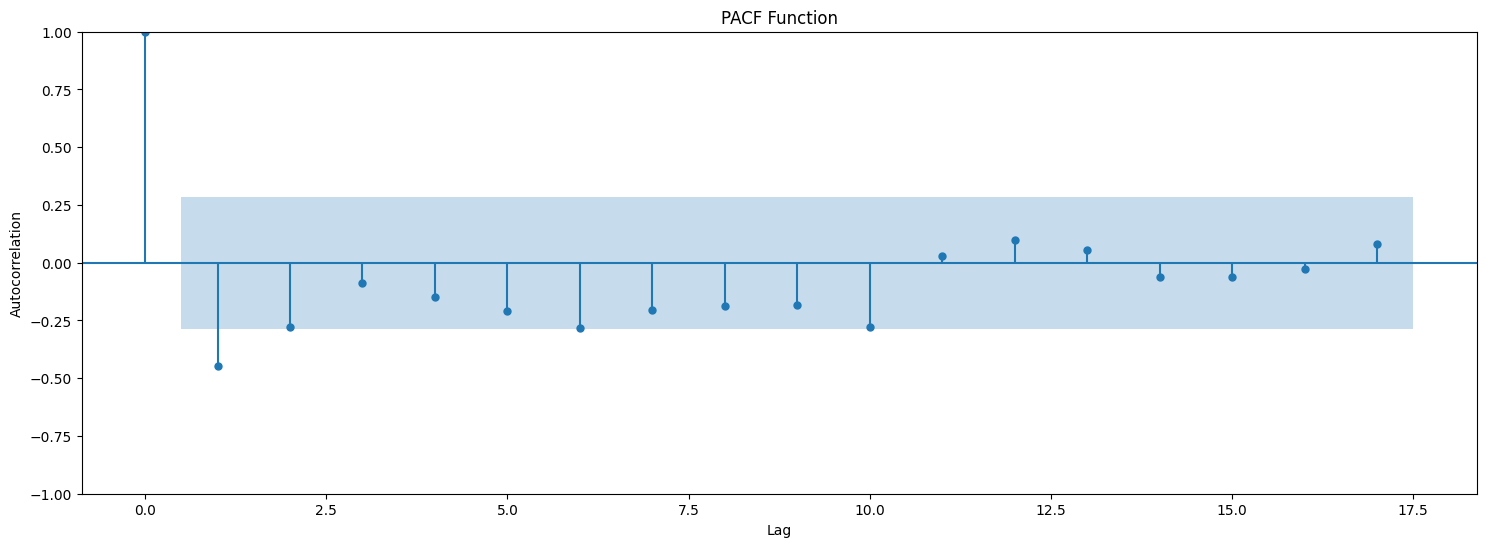

In [43]:
plt.plot(data.diff()); 
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Sales')
acf1 = plot_pacf(data.diff().dropna())
plt.title('PACF Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

In above partial autocorrelation plot, we don't observe any significant spikes in lower order lags (however,a slight portion of first lag is into the negative zone).  Therefore, we can be conservative and tentatively **fix the p as 1 (we can try with 0 later).**

#### **How to find the order of the 'MA term' - 'q'**

- We take a look at the ACF plot for the number of MA terms. An MA term is Technically, the error of the lagged forecast. 
- The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Text(0, 0.5, 'Autocorrelation')

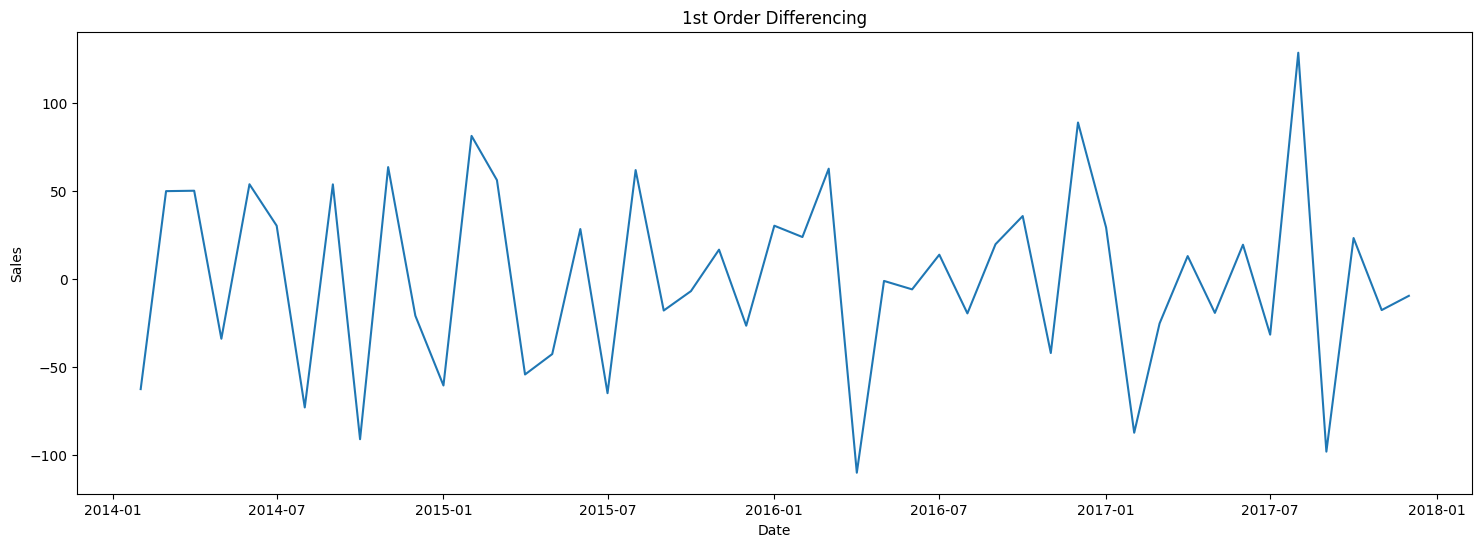

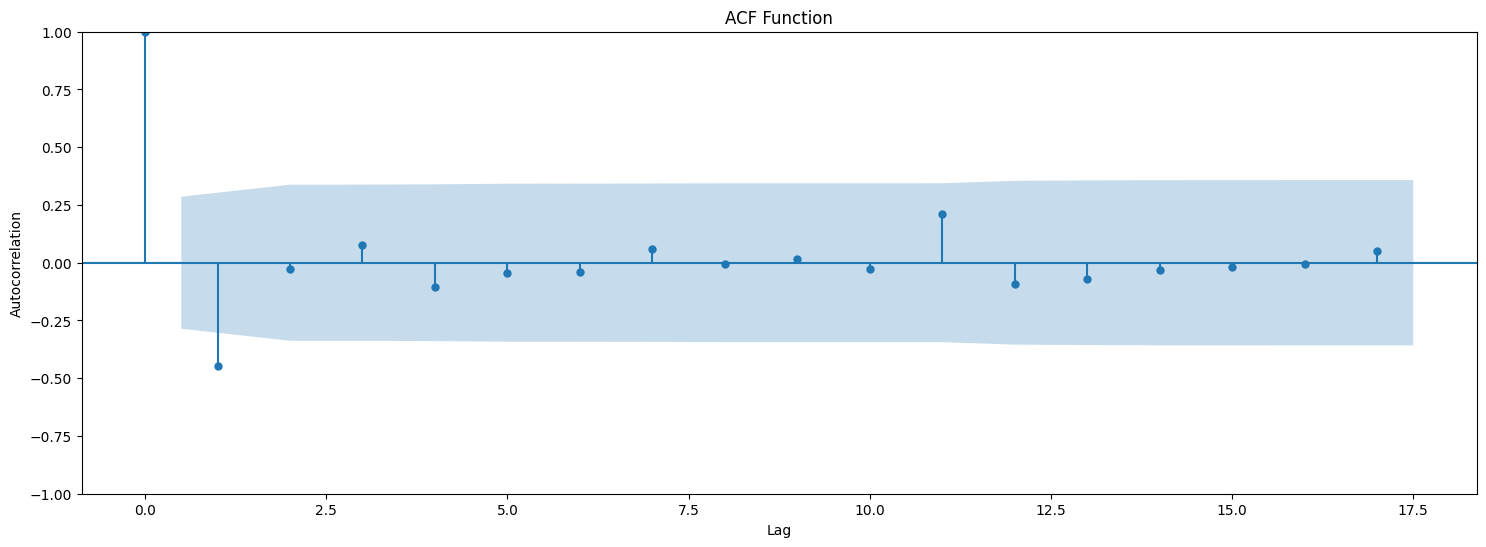

In [44]:
plt.plot(data.diff()); 
plt.title('1st Order Differencing')
plt.xlabel('Date')
plt.ylabel('Sales')
acf1 = plot_acf(data.diff().dropna())
plt.title('ACF Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

Even with lag 1 the autocorrelation is going negative. Let’s tentatively fix **q as 1.**

### **Building the ARIMA Model:**

Now that we've determined the values of p, d and q, we have everything needed to fit the ARIMA model. 

Let’s use the ARIMA() implementation in statsmodels package.

### _ARIMA with parameters {1, 1, 1}_

In [45]:
mod_default = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_default = mod_default.fit()

c:\Users\Paridhi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [46]:
print(results_default.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0864        nan        nan        nan         nan         nan
ma.L1         -1.1004   8.19e-24  -1.34e+23      0.000      -1.100      -1.100
ar.S.L12      -0.2710   7.99e-28  -3.39e+26      0.000      -0.271      -0.271
ma.S.L12   -6.339e+13   9.89e-33  -6.41e+45      0.000   -6.34e+13   -6.34e+13
sigma2      5.953e-14    3.3e-10      0.000      1.000   -6.47e-10    6.47e-10


#### _Results for above run:_

- The summary attribute that results from the output of SARIMAX returns a significant amount of information, but we'll focus our attention on the table of coefficients. 

  1.  The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 
  2.  The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

- When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. 
- The `plot_diagnostics` object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

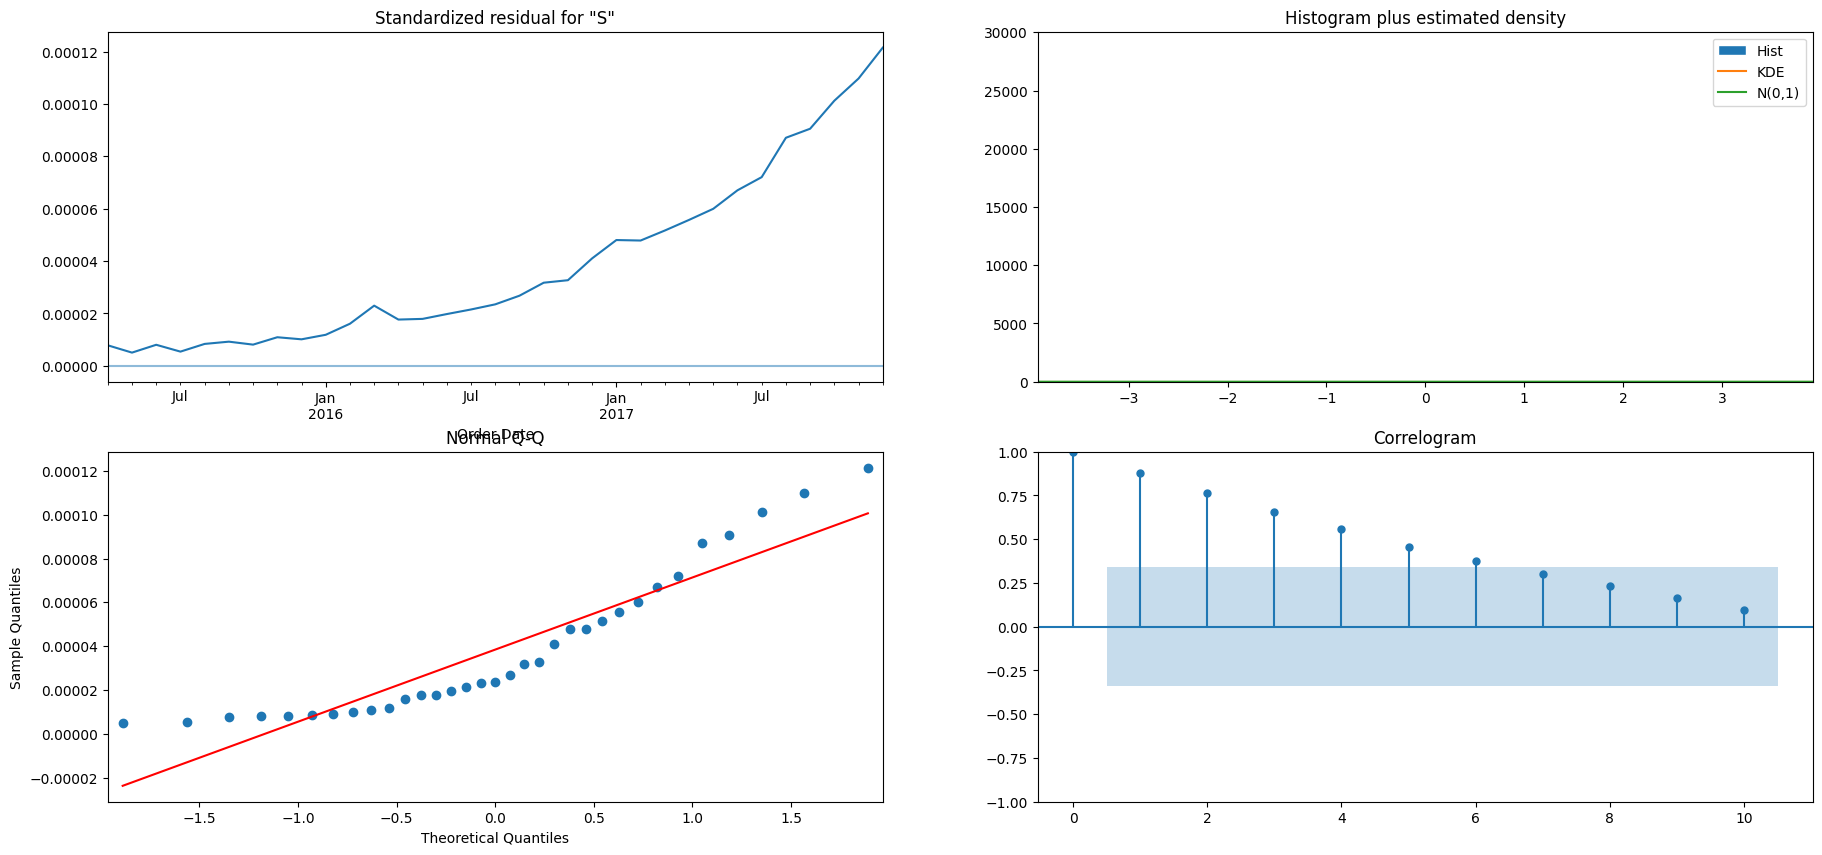

In [47]:
residuals_default = results_default.plot_diagnostics(figsize=(22, 10))

- Our primary concern is to ensure that the residuals of our model are 
    1. Uncorrelated and 
    2. Normally distributed with zero-mean. 
    
- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

- In this case, our model diagnostics suggests that the model residuals are normally distributed. Plus more observations as follows:-

    - In the top right plot, we see that the red KDE line really does not follow closely with the N(0,1) line (where N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Hence the residual plots are not perfectly normally distributed.
    
    - The qq-plot on the bottom left shows that the moderately ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is not really a strong indication that the residuals are normally distributed.
       
Those observations lead us to conclude that our **model produces a satisfactory fit** that could help us understand our time series data and forecast future values.

> Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. 

> For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### _Validating Forecasts:_

We have obtained a model for our time series that can now be used to produce forecasts. 

We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

The `get_prediction()` and `conf_int()` attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

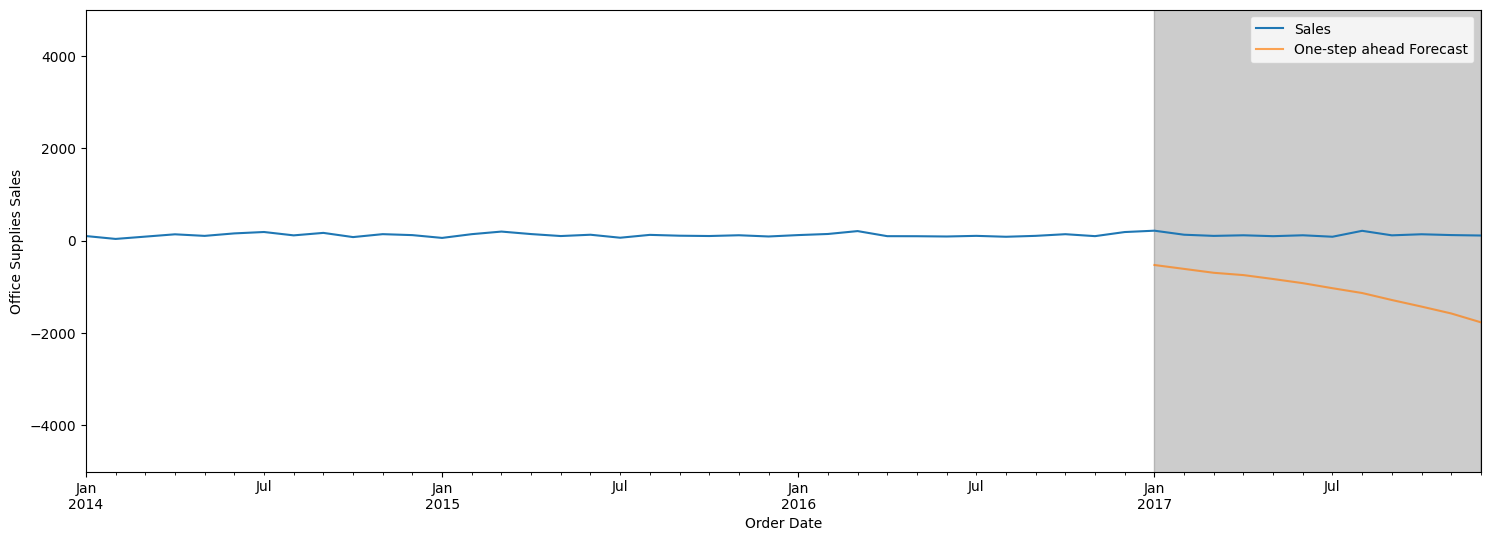

In [48]:
pred = results_default.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2014':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.set_ylim([-5 * 1e3, 5 * 1e3])
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()
# The line plot is showing the observed values compared to the rolling forecast predictions. 
# Overall, our forecasts slightly differs with the true values, but shows an upward trend starts from the 
# beginning of the year and captured the seasonality toward the end of the year.

#### _Observations:_
- The line plot is showing the observed values compared to the rolling forecast predictions. 
- Overall, our forecasts differ largely from the true values, but show an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

#### _Error Calculations:_

In [49]:
y_forecasted = pred.predicted_mean          #Predicted sales values
y_truth = Office_Supplies.loc['2017-01-01':]['Sales']  #Actual sales values

In [50]:
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 2163060.9
The Root Mean Squared Error of our forecasts is 1470.73


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. 

The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily technology sales in the test set within a desirable range of the real sales. 

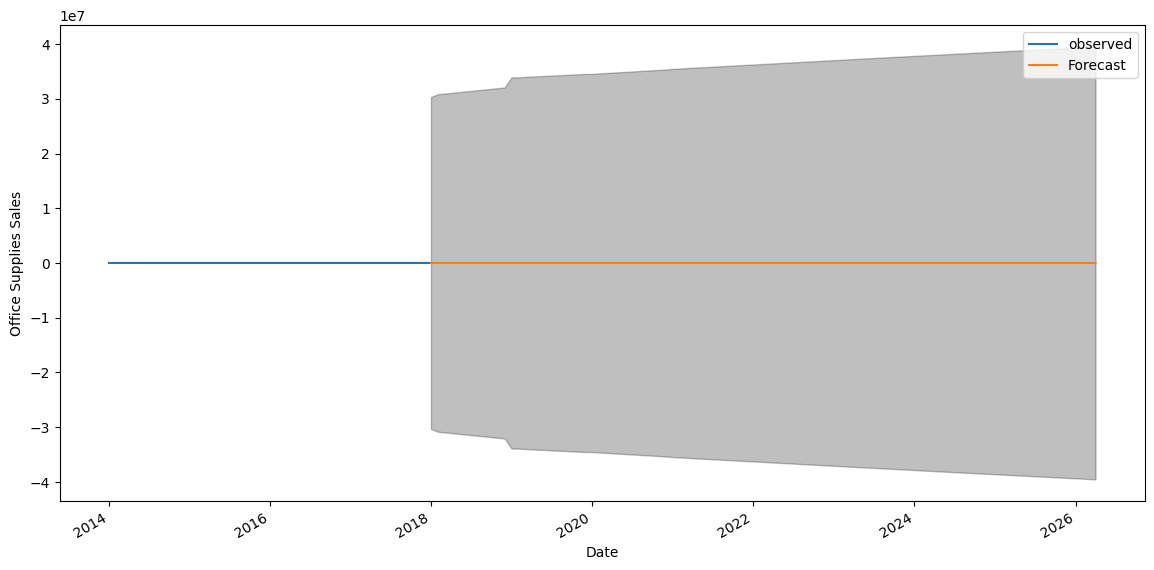

In [51]:
pred_uc = results_default.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = Office_Supplies['Sales'].plot(label='observed', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

### **Optimal Parameter Selection for the ARIMA Time Series Model**

- When looking to fit time series data with a seasonal ARIMA model, our first goal is to find the values of ARIMA(p,d,q) that optimize a metric of interest. 

- There are many guidelines and best practices to achieve this goal, yet the correct parametrization of ARIMA models can be a painstaking manual process that requires domain expertise and time. 

- Hence, we will use a "grid search" to iteratively explore different combinations of parameters. 

- For each combination of parameters, I fit a new seasonal ARIMA model with the `SARIMAX()` function from the `statsmodels` module and assess its overall quality. 

- Once we have explored the entire landscape of parameters, our optimal set of parameters will be the one that yields the best performance for our criteria of interest. 

In [52]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

We define the p, d and q parameters to take any value between 0 and 2. Then, we generate all different combinations of p, q and q triplets.

In [53]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

Next, we generate all different combinations of seasonal p, d and q triplets

In [54]:
print('Some examples of parameter combinations for Seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Some examples of parameter combinations for Seasonal ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


We can now use the triplets of parameters defined above to automate the process of training and evaluating ARIMA models on different combinations. 

In Statistics and Machine Learning, this process is known as __grid search (or hyperparameter optimization)__ for model selection.

When evaluating and comparing statistical models fitted with different parameters, each can be ranked against one another based on how well it fits the data or its ability to accurately predict future data points. 

We will use the **AIC (Akaike Information Criterion)** value, which is conveniently returned with ARIMA models fitted using statsmodels. _The AIC measures how well a model fits the data while taking into account the overall complexity of the model._ 

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. 

Therefore, we are interested in **finding the model that yields the lowest AIC value.**

In [55]:
warnings.filterwarnings("ignore")
results_params = []
results_aic = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            results_params.append(str(param) +'x'+ str(param_seasonal))
            results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:589.5002315061224
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1490.7646767623262
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:383.4175511140716
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:248.89284131159903
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:394.83867919808836
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1288.1157552291895
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:260.5044719309093
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:250.10262158197176
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:545.8315751699338
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2583.711828687419
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:371.8194830276627


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:240.3985698865137
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:396.4373424315816
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2401.60329528367
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:262.1735163819379
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:242.26144570274394
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:496.8049609774628
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1247.8581722279587
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:391.41369840458316
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:251.89413914217448
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:378.31299876316575
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1393.7755745496509
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:262.69697403059604
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:252.119957531934
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:466.0870809627682
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1591.6087222583838
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:363.8692923372543
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:231.55283799226925
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:363.3413721124734
ARI

In [56]:
results = zip(results_params, results_aic)
results = sorted(results, key = lambda x: x[1])
results[:5]

[('(0, 1, 1)x(0, 1, 1, 12)', 231.55283799226925),
 ('(1, 1, 1)x(0, 1, 1, 12)', 233.53069429554319),
 ('(0, 1, 1)x(1, 1, 1, 12)', 233.55283788691762),
 ('(1, 1, 1)x(1, 1, 1, 12)', 235.53068980338858),
 ('(0, 0, 1)x(0, 1, 1, 12)', 240.3985698865137)]

The output of our code suggests that SARIMAX(0, 1, 1)x(0, 1, 1, 12) yields the lowest AIC value of 231.55. 

We should therefore consider this to be the optimal option out of all the models we have considered.

### **Fitting ARIMA Model with Optimized Parameters after Grid Search**

In [57]:
mod = sm.tsa.statespace.SARIMAX(data, order = (0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_invertibility=False)
final_fit_res = mod.fit()
print(final_fit_res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   2056.549     -0.000      1.000   -4031.762    4029.762
ma.S.L12      -0.5111      0.541     -0.945      0.345      -1.571       0.549
sigma2      2634.0483   5.42e+06      0.000      1.000   -1.06e+07    1.06e+07


The summary attribute that results from the output of SARIMAX returns a significant amount of information, but let us focus our attention on the table of coefficients. 

 - The 'coef' column shows the weight (i.e. importance) of each feature and how each one impacts the time series. 
 - The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model. (Except 'ma.S.L12' or 'lag 2', which is not relevant to us)

- When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

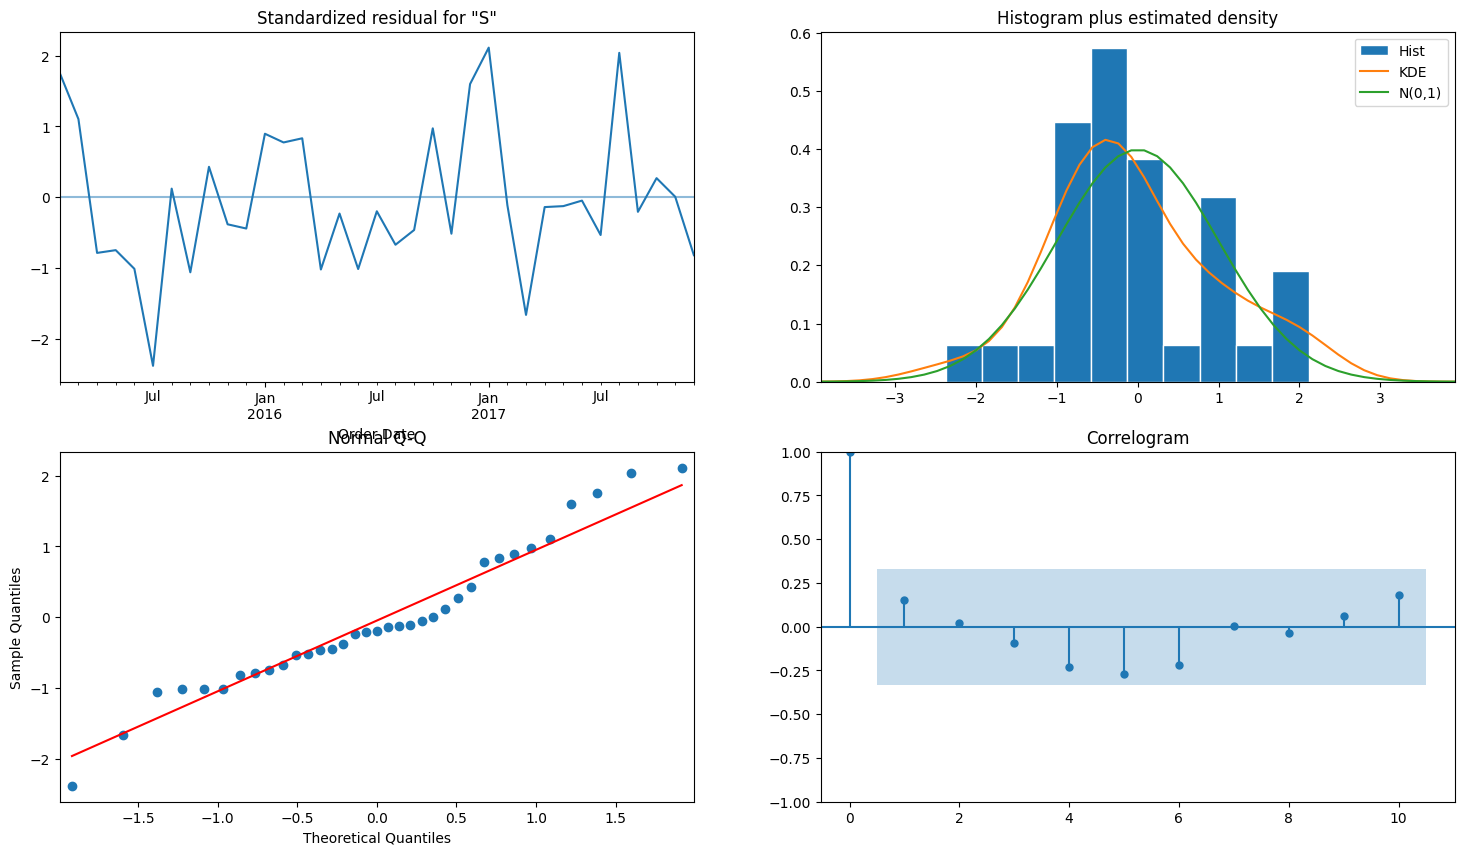

In [58]:
final_residuals = final_fit_res.plot_diagnostics(figsize=(18, 10))

- Our primary concern is to ensure that the residuals of our model are 
    - uncorrelated and 
    - normally distributed with zero-mean. 
    
- If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

- In this case, our model diagnostics suggests that the model residuals are normally distributed. Plus more observations as follows:-

    - In the top right plot, we see that the red KDE line really does not follow closely with the N(0,1) line (where N(0,1) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). Hence, the _residual plots are not perfectly normally distributed._
    
    - The qq-plot on the bottom left shows that the moderately ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is not really a strong indication that the residuals are normally distributed.
       
Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

**Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit.** For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

### _Validating Forecasts:_

I have obtained a model for our time series that can now be used to produce forecasts. 

I start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

The `get_prediction()` and `conf_int()` attributes allow us to obtain the values and associated confidence intervals for forecasts of the time series.

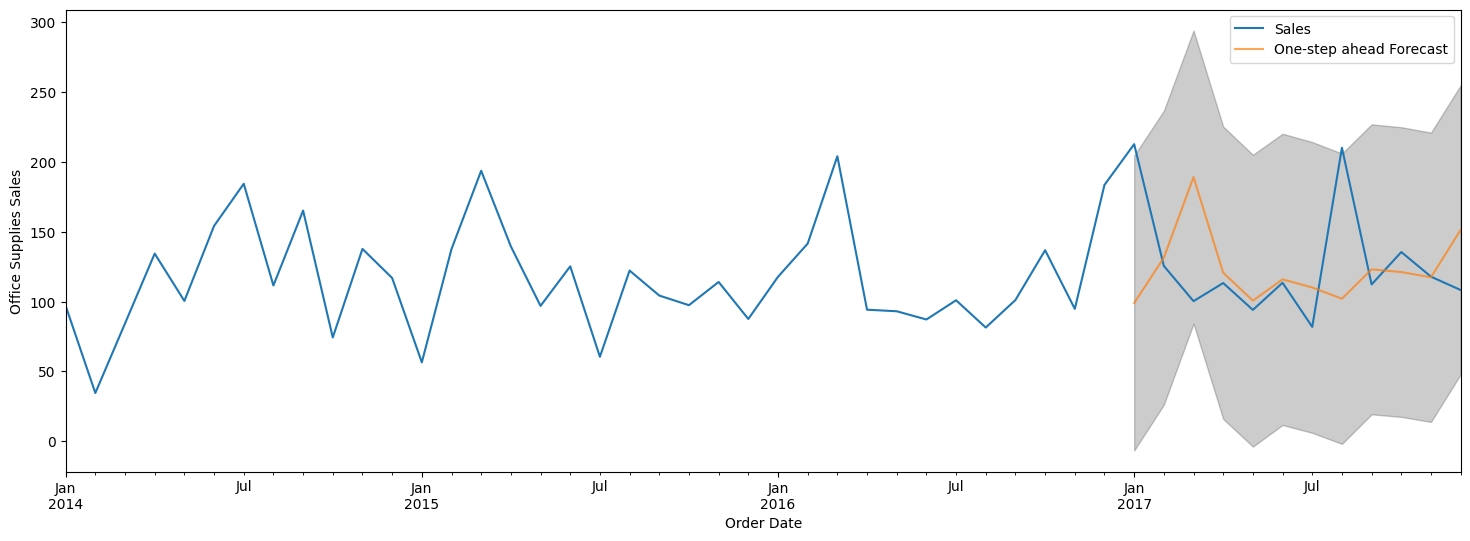

In [59]:
final_pred = final_fit_res.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
final_ci = final_pred.conf_int()
ax = data['2014':].plot(label='observed')

final_pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(final_ci.index, final_ci.iloc[:, 0], final_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Order Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

Overall, our forecasts slightly differs with the true values, but shows an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

### **Accuracy of prediction (metrics)**

MSE (Mean Squared Error) summarizes the average error of our forecasts.
For each predicted value, we compute its distance from the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [60]:
y_pred = final_pred.predicted_mean
y_truth = Office_Supplies.loc['2017-01-01':]['Sales']
mse = ((y_pred - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 102252.57
The Root Mean Squared Error of our forecasts is 319.77


### Dynamic forecasts
We get dynamic forecasts by setting `dynamic=True` under the `sm.tsa.statespace.SARIMAX()` function

In [61]:
mod2 = sm.tsa.statespace.SARIMAX(data, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_invertibility=False)

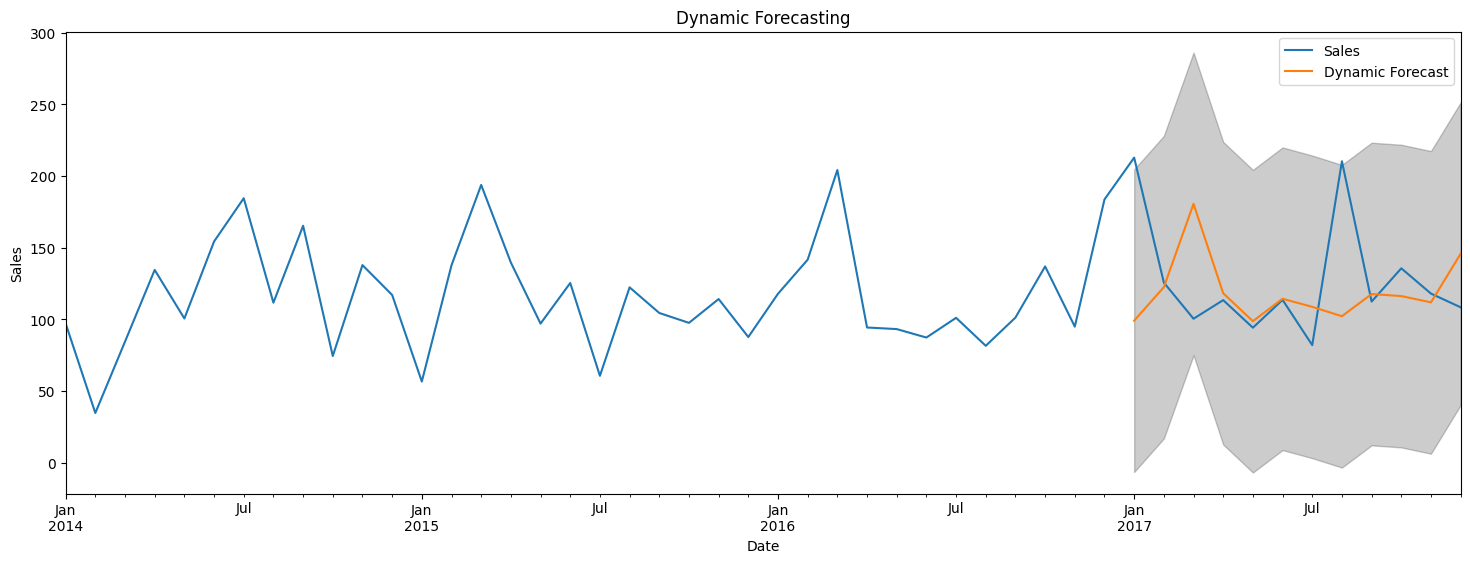

In [62]:
dynamic_pred = final_fit_res.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True)
dynamic_ci = dynamic_pred.conf_int()

ax = data['2014':].plot(label='Observed')
dynamic_pred.predicted_mean.plot(ax=ax, label='Dynamic Forecast')
ax.fill_between(dynamic_ci.index, dynamic_ci.iloc[:, 0], dynamic_ci.iloc[:, 1], color = 'k', alpha=0.2)

ax.set_ylabel('Sales')
ax.set_xlabel('Date')
ax.set_title('Dynamic Forecasting')
plt.legend()
plt.show()

#### **Metric Evaluation and Validation**

In [63]:
y_dyn_forc = dynamic_pred.predicted_mean
rmse = ((y_dyn_forc - y_truth)**2).mean()
mape = np.mean(np.abs(y_dyn_forc - y_truth)/np.abs(y_truth))
mae = np.mean(np.abs(y_dyn_forc - y_truth))
mpe = np.mean((y_dyn_forc - y_truth)/y_truth)

print('Root Mean Squared Error (RMSE) : {}'.format(round(np.sqrt(rmse), 2)))
print('Mean Absolute Percentage Error (MAPE) : {}'.format(round(np.sqrt(mape), 2)))
print('Mean Absolute Error (MAE) : {}'.format(round(np.sqrt(mae), 2)))
print('Mean Percentage Error (MPE) : {}'.format(round(np.sqrt(mpe), 2)))

Root Mean Squared Error (RMSE) : 319.34
Mean Absolute Percentage Error (MAPE) : 2.88
Mean Absolute Error (MAE) : 11.93
Mean Percentage Error (MPE) : 1.35


### _Observations:_
Our dynamic forecasts are quite similar to our static forecasts. However, dynamic forecasts have a slight lower MSE and hence, are slightly better.

## Final Optimized Model with Train Test Split

In [64]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.values[:train_size], data.values[train_size:]

# Define the range of parameter values for grid search
p_values = range(0, 6)  # AR parameter
d_values = range(0, 3)  # Differencing parameter
q_values = range(0, 6)  # MA parameter

# Perform grid search for ARIMA parameters
best_rmse = float('inf')
best_params = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        model = ARIMA(train, order=order)
        arima_model = model.fit()
        predictions = arima_model.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, predictions))
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = order
    except:
        continue

print("Best ARIMA Parameters:", best_params)
print("Best RMSE:", best_rmse)

Best ARIMA Parameters: (5, 0, 4)
Best RMSE: 30.65602792077015


In [65]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   38
Model:                 ARIMA(5, 2, 5)   Log Likelihood                -187.800
Date:                Wed, 17 Apr 2024   AIC                            397.601
Time:                        17:11:30   BIC                            415.019
Sample:                             0   HQIC                           403.680
                                 - 38                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3696      0.644     -0.574      0.566      -1.632       0.892
ar.L2         -0.4519      0.445     -1.016      0.310      -1.324       0.420
ar.L3         -0.6463      0.546     -1.184      0.237      -1.716       0.424
ar.L4         -0.0973      0.554     -0.176      0.861      -1.183       0.989
ar.L5         -0.0731      0.399     -0.183      0.855      -0.855       0.709
ma.L1         -1.2747    127.181     -0.010      0.992    -250.544     247.995
ma.L2          0.3499    246.006      0.001      0.999    -481.813     482.512
ma.L3          0.4191    284.251      0.001      0.999    -556.702     557.540
ma.L4         -1.3495    244.216     -0.006      0.996    -480.003     477.304
ma.L5          0.8555    116.077      0.007      0.994    -226.652     228.363
sigma2      1461.4821   1.99e+05      0.007      0.994   -3.88e+05    3.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.87   Prob(JB):                         0.79
Heteroskedasticity (H):               1.10   Skew:                             0.15
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

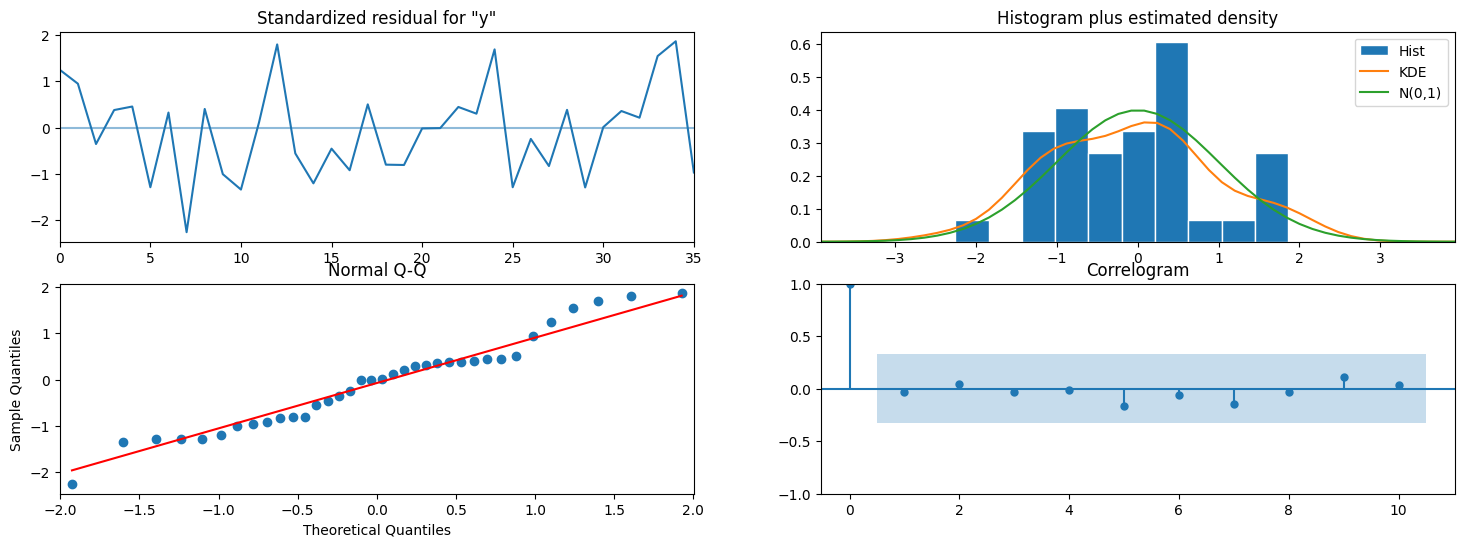

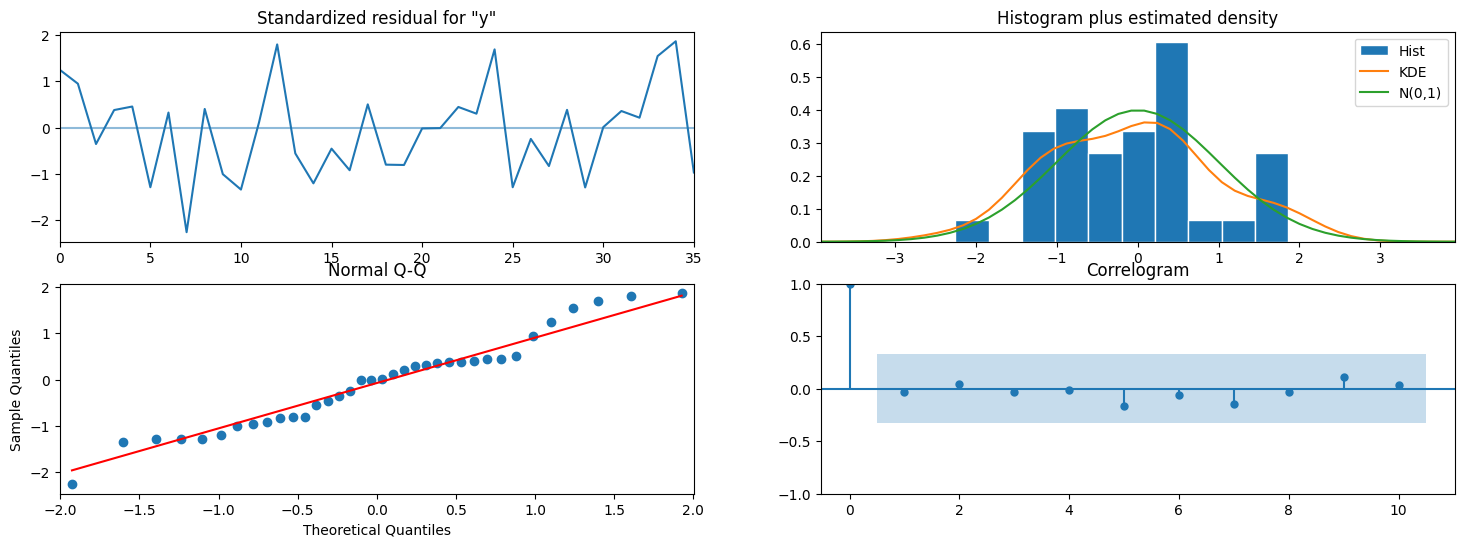

In [66]:
arima_model.plot_diagnostics()

### A. Static Forecasts 

In [67]:
predictions = list()
history = [x for x in train]

for t in range(len(test)):
    model = ARIMA(history, order=(5,0,4))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=107.695335, expected=100.346800
predicted=89.234293, expected=113.324744
predicted=61.778015, expected=94.088795
predicted=100.991886, expected=113.503617
predicted=125.545990, expected=81.931744
predicted=122.640902, expected=210.208755
predicted=105.234874, expected=112.309306
predicted=78.514523, expected=135.512894
predicted=128.452021, expected=117.873921
predicted=105.495314, expected=108.316520


#### _Metric Evaluation_

In [68]:
rmse = np.sqrt(mean_squared_error(test, predictions))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
mae = np.mean(np.abs(predictions- test))
mpe = np.mean((predictions - test)/test)

print('Root Mean Squared Error (RMSE) : {}'.format(round(rmse, 2)))
print('Mean Absolute Percentage Error (MAPE) : {}'.format(round(mape, 2)))
print('Mean Absolute Error (MAE) : {}'.format(round(mae, 2)))
print('Mean Percentage Error (MPE) : {}'.format(round(mpe, 2)))

Root Mean Squared Error (RMSE) : 38.5
Mean Absolute Percentage Error (MAPE) : 0.22
Mean Absolute Error (MAE) : 29.15
Mean Percentage Error (MPE) : -0.09


#### _Validating Forecasts_

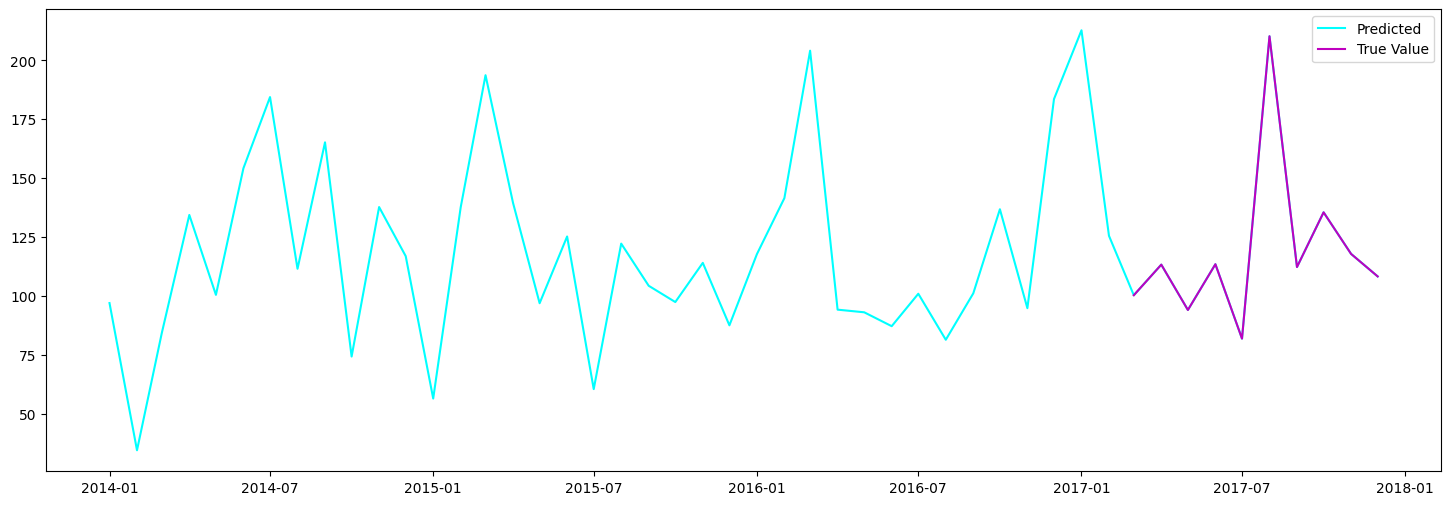

In [69]:
#obs.plot(label='observed')
#yhat.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
plt.plot(data.index, data.values, color='cyan', label='Predicted')
plt.plot(data.index[train_size:], test, color='m',label='True Value')
ax.set_xlabel('Order Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

### B. Dynamic Forecasts

In [70]:
predictions = list()
history = [x for x in train]

for t in range(len(test)):
    model = ARIMA(history, order=(4,2,3))
    model_fit = model.fit()
    output = model_fit.forecast(dynamic=True)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=135.483362, expected=100.346800
predicted=176.879929, expected=113.324744
predicted=104.069331, expected=94.088795
predicted=108.632684, expected=113.503617
predicted=107.057664, expected=81.931744
predicted=112.786681, expected=210.208755
predicted=179.470810, expected=112.309306
predicted=106.847205, expected=135.512894
predicted=172.040169, expected=117.873921
predicted=136.333485, expected=108.316520


In [71]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:                 ARIMA(4, 2, 3)   Log Likelihood                -238.389
Date:                Wed, 17 Apr 2024   AIC                            492.777
Time:                        17:11:43   BIC                            507.230
Sample:                             0   HQIC                           498.165
                                 - 47                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.2655      0.390     -5.807      0.000      -3.030      -1.501
ar.L2         -2.1971      0.633     -3.470      0.001      -3.438      -0.956
ar.L3         -1.0516      0.461     -2.282      0.022      -1.955      -0.148
ar.L4         -0.2973      0.188     -1.583      0.113      -0.666       0.071
ma.L1          0.7298      2.972      0.246      0.806      -5.096       6.555
ma.L2         -0.7400      2.672     -0.277      0.782      -5.976       4.496
ma.L3         -0.9898      0.436     -2.270      0.023      -1.844      -0.135
sigma2      2021.9499      0.004   5.65e+05      0.000    2021.943    2021.957
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.96   Prob(JB):                         0.70
Heteroskedasticity (H):               0.98   Skew:                             0.28
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+22. Standard errors may be unstable.
"""

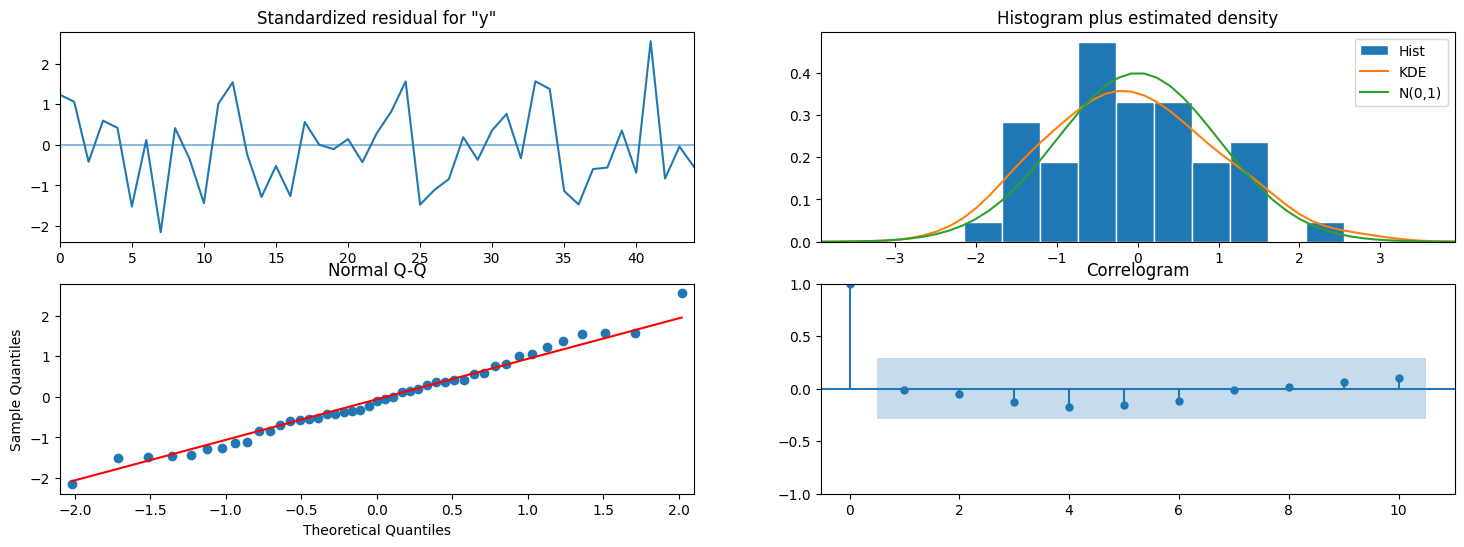

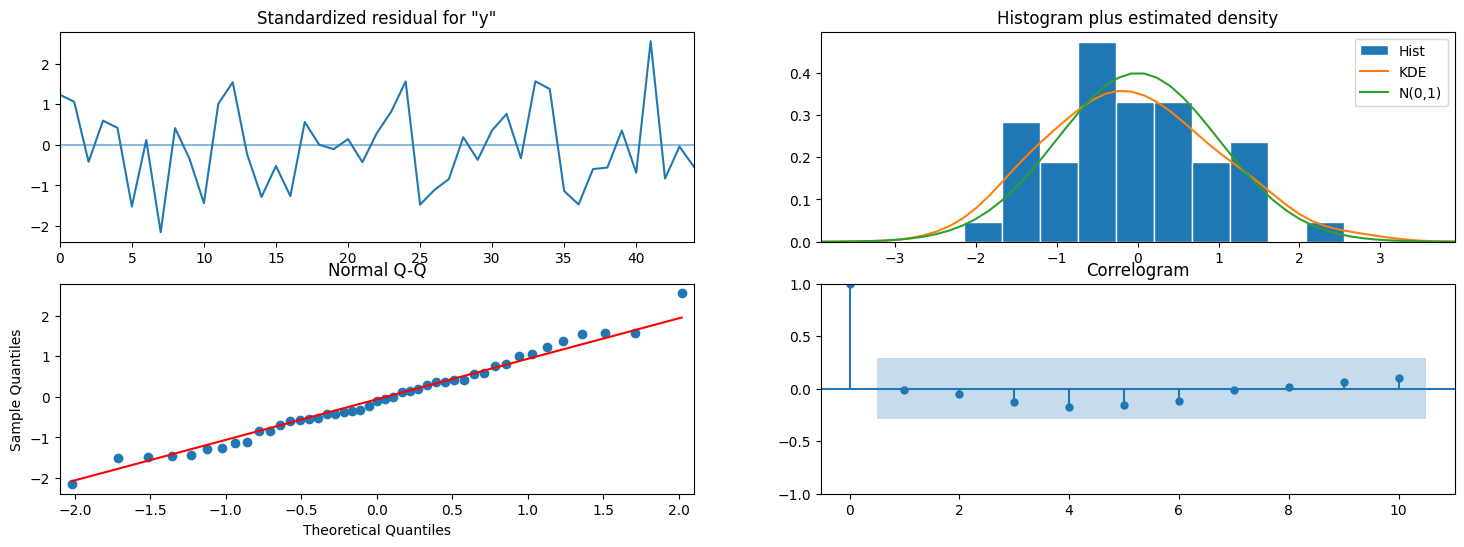

In [72]:
model_fit.plot_diagnostics()

#### _Metric Evaluation_

In [73]:
rmse = np.sqrt(mean_squared_error(test, predictions))
mape = np.mean(np.abs(predictions - test)/np.abs(test))
mae = np.mean(np.abs(predictions- test))
mpe = np.mean((predictions - test)/test)

print('Root Mean Squared Error (RMSE) : {}'.format(round(rmse, 2)))
print('Mean Absolute Percentage Error (MAPE) : {}'.format(round(mape, 2)))
print('Mean Absolute Error (MAE) : {}'.format(round(mae, 2)))
print('Mean Percentage Error (MPE) : {}'.format(round(mpe, 2)))

Root Mean Squared Error (RMSE) : 49.57
Mean Absolute Percentage Error (MAPE) : 0.31
Mean Absolute Error (MAE) : 35.93
Mean Percentage Error (MPE) : 0.19


#### _Validating Forecasts_

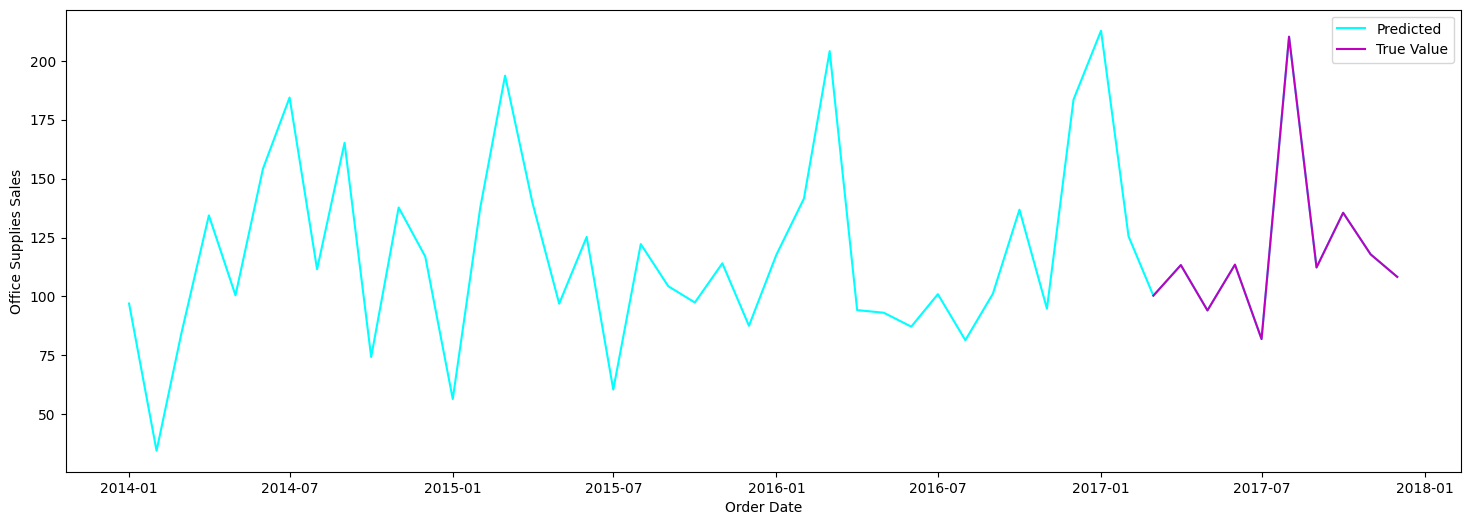

In [76]:
plt.plot(data.index, data.values, color='cyan', label='Predicted')
plt.plot(data.index[train_size:], test, color='m',label='True Value')
plt.xlabel('Order Date')
plt.ylabel('Office Supplies Sales')
plt.legend()
plt.show()

### _Observations:_
Our static forecasts perform better than our dynamic forecasts for this case.

### **Validating Future Forecasts:**

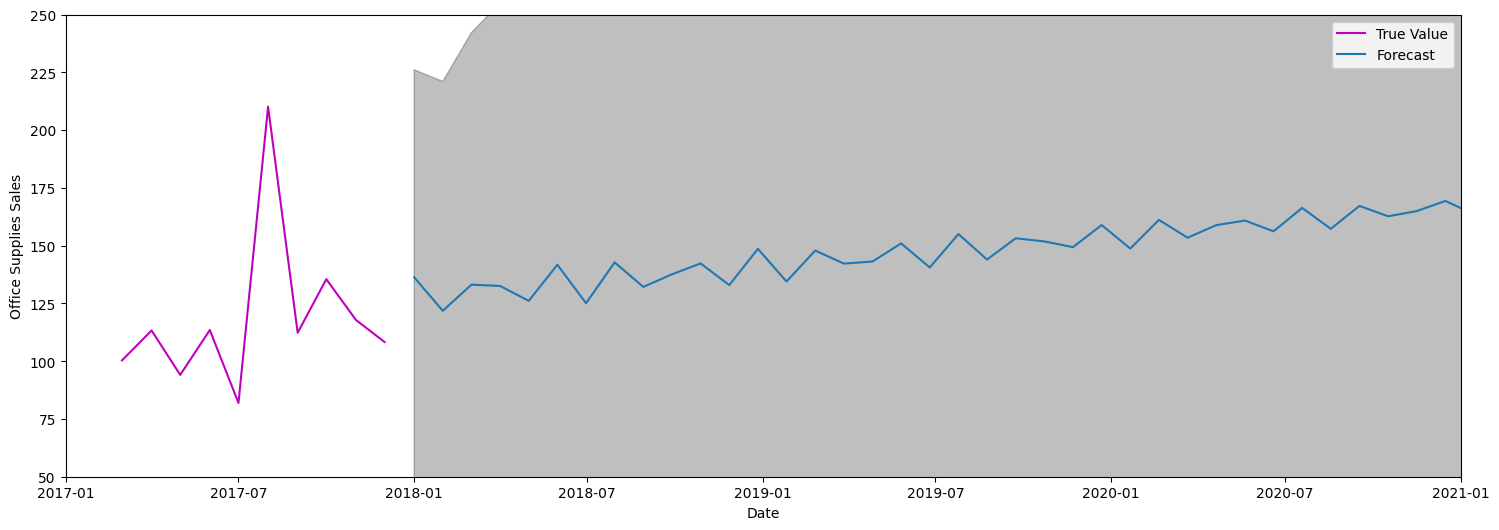

In [75]:
pred_idx = pd.to_datetime('2018-01-01') + pd.timedelta_range(0, periods=50, freq="30D")
pred_vals = model_fit.get_forecast(steps=50)
pred_vals_ci = pd.DataFrame(pred_vals.conf_int())

plt.plot(data.index[train_size:], test, color='m',label='True Value')
plt.plot(pred_idx, pred_vals.predicted_mean, label='Forecast')
plt.fill_between(pred_idx, pred_vals_ci.iloc[:, 0], pred_vals_ci.iloc[:, 1], color='k', alpha=.25)
plt.xlim([pd.to_datetime('2017-01-01'), pd.to_datetime('2021-01-01')])
plt.ylim([50, 250])
plt.xlabel('Date')
plt.ylabel('Office Supplies Sales')
plt.legend()
plt.show()

As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

## _Future Improvements:_

Here are a few suggested improvements:
1. Change the start date of the dynamic forecasts to see how this affects the overall quality of our forecasts.
2. Try more combinations of parameters to see if we can improve the goodness-of-fit of the model.
3. Select a different metric to select the best model. For example, we used the AIC measure to find the best model, but we could seek to optimize the out-of-sample mean square error instead.